# Import Modules and Load Dataset

### Import Modules

In [1]:
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score
from sklearn.feature_selection import SelectKBest, mutual_info_classif, chi2
from sklearn import metrics
from sklearn.tree import export_graphviz
from sklearn import linear_model, tree, ensemble
from warnings import simplefilter
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

### Load Dataset, Take only 4 Category, Shuffle Dataset

In [2]:
df_base = pd.read_csv("BaseCrimeDemoDataset-v1.1.csv")
df_base = df_base[df_base['crime']!='robbery']
df_base = df_base[df_base['crime']!='kidnap']
df_base = df_base.sample(frac=1)

### Data Duplication for experiment

In [3]:
# frames = [df_base, df_base.sample(frac=.10)]
# df_base = pd.concat(frames)

### Exploring Dataset

In [4]:
df_base

,id,incident_year,incident_month,incident_week,incident_weekday,weekend,part_of_the_day,latitude,longitude,incident_place,...,police_station,cyber_cafe,school,college,cinema,District,Upazilla,FixedLoca,crime,news_link
1287,C_1287,2018,4,15,tuesday,0,morning,22.316670,91.816670,banshkhali,...,6,0,25,4,0,chattogram,banshkhali,banshkhali,rape,https://www.thedailystar.net/city/headteacher-...
1441,C_1441,2019,5,21,monday,0,night,22.316670,91.816670,boalkhali,...,3,3,29,3,0,chattogram,boalkhali,boalkhali,bodyfound,https://www.thedailystar.net/city/news/student...
5333,C_5333,2016,9,35,friday,1,night,24.841700,89.375000,bogra sadar,...,7,7,56,9,4,bogura,bogra sadar,bogra sadar,bodyfound,https://www.thedailystar.net/country/youth-fou...
113,C_113,2018,3,10,thursday,0,noon,23.728907,90.417137,nakhalpara,...,60,478,242,64,40,dhaka,dhaka metropolitan,dhaka metropolitan,murder,https://www.thedailystar.net/backpage/woman-60...
798,C_798,2017,8,34,thursday,0,morning,23.858330,90.266670,savar,...,6,16,42,10,3,dhaka,savar,savar,bodyfound,https://www.thedailystar.net/city/unidentified...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2306,C_2306,2016,5,20,sunday,0,morning,22.870267,89.237263,keshabpur,...,3,1,73,12,0,jashore,keshabpur,keshabpur,murder,https://www.thedailystar.net/country/al-leader...
331,C_331,2018,9,35,sunday,0,night,23.858330,90.266670,savar,...,6,16,42,10,3,dhaka,savar,savar,rape,https://www.thedailystar.net/news/city/transpo...
3669,C_3669,2013,12,49,saturday,1,night,23.605717,89.841728,faridpur sadar,...,3,0,74,8,3,faridpur,faridpur sadar,faridpur sadar,rape,https://www.thedailystar.net/news/khokon-raped...
216,C_216,2013,1,4,thursday,0,evening,23.850000,90.010000,manikganj,...,60,478,242,64,40,dhaka,dhaka metropolitan,dhaka metropolitan,rape,https://www.thedailystar.net/news-detail-266622


In [5]:
df_base.columns

Index(['id', 'incident_year', 'incident_month', 'incident_week',
       'incident_weekday', 'weekend', 'part_of_the_day', 'latitude',
       'longitude', 'incident_place', 'incident_district', 'incident_division',
       'max_temp', 'avg_temp', 'min_temp', 'weather_code', 'precip',
       'humidity', 'visibility', 'cloudcover', 'heatindex', 'season',
       'weather_description', 'weather', 'distance_btn_areas',
       'distance_btn_dist', 'household', 'male_population',
       'female_population', 'total_population', 'gender_ration',
       'average_household_size', 'density_per_kmsq', 'literacy_rate',
       'religious_institution', 'playground', 'park', 'police_station',
       'cyber_cafe', 'school', 'college', 'cinema', 'District', 'Upazilla',
       'FixedLoca', 'crime', 'news_link'],
      dtype='object')

### Dataframe Column Dictionary for droping column

In [6]:
df_columns_dictionary = {
    'id':0,
    'incident_year':0,
    'incident_month':1,
    'incident_week':1,
    'incident_weekday':1,
    'weekend':1,
    'part_of_the_day':1,
    'latitude':1,
    'longitude':1,
    'incident_place':1,
    'incident_district':1,
    'incident_division':1,
    'max_temp':1,
    'avg_temp':1,
    'min_temp':1,
    'weather_code':1,
    'precip':1,
    'humidity':1,
    'visibility':1,
    'cloudcover':1,
    'heatindex':1,
    'season':1,
    'weather_description':0,
    'weather':1,
    'distance_btn_areas':1,
    'distance_btn_dist':1,
    'household':1,
    'male_population':1,
    'female_population':1,
    'total_population':1,
    'gender_ration':1,
    'average_household_size':1,
    'density_per_kmsq':1,
    'literacy_rate':1,
    'religious_institution':1,
    'playground':1,
    'park':1,
    'police_station':1,
    'cyber_cafe':1,
    'school':1,
    'college':1,
    'cinema':1,
    'District':0, 
    'Upazilla':0,
    'FixedLoca':0,
    'crime':1,
    'news_link':0
}

### Droping Unnecessary Columns

In [7]:
df_base_col = df_base.columns
df = df_base.copy()
for item in df_base_col:
    if df_columns_dictionary[item] == 0:
        df.drop([item], axis = 1, inplace=True)

# Data Preparation

In [8]:
df

,incident_month,incident_week,incident_weekday,weekend,part_of_the_day,latitude,longitude,incident_place,incident_district,incident_division,...,literacy_rate,religious_institution,playground,park,police_station,cyber_cafe,school,college,cinema,crime
1287,4,15,tuesday,0,morning,22.316670,91.816670,banshkhali,chattogram,chattogram,...,37.4,718,13,1,6,0,25,4,0,rape
1441,5,21,monday,0,night,22.316670,91.816670,boalkhali,chattogram,chattogram,...,58.9,275,3,0,3,3,29,3,0,bodyfound
5333,9,35,friday,1,night,24.841700,89.375000,bogra sadar,bogura,rajshahi,...,65.7,1164,23,4,7,7,56,9,4,bodyfound
113,3,10,thursday,0,noon,23.728907,90.417137,nakhalpara,dhaka,dhaka,...,74.6,4289,99,17,60,478,242,64,40,murder
798,8,34,thursday,0,morning,23.858330,90.266670,savar,dhaka,dhaka,...,68.0,1118,78,3,6,16,42,10,3,bodyfound
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2306,5,20,sunday,0,morning,22.870267,89.237263,keshabpur,jashore,khulna,...,55.2,895,75,2,3,1,73,12,0,murder
331,9,35,sunday,0,night,23.858330,90.266670,savar,dhaka,dhaka,...,68.0,1118,78,3,6,16,42,10,3,rape
3669,12,49,saturday,1,night,23.605717,89.841728,faridpur sadar,faridpur,dhaka,...,55.8,856,108,1,3,0,74,8,3,rape
216,1,4,thursday,0,evening,23.850000,90.010000,manikganj,dhaka,dhaka,...,74.6,4289,99,17,60,478,242,64,40,rape


In [9]:
df.columns

Index(['incident_month', 'incident_week', 'incident_weekday', 'weekend',
       'part_of_the_day', 'latitude', 'longitude', 'incident_place',
       'incident_district', 'incident_division', 'max_temp', 'avg_temp',
       'min_temp', 'weather_code', 'precip', 'humidity', 'visibility',
       'cloudcover', 'heatindex', 'season', 'weather', 'distance_btn_areas',
       'distance_btn_dist', 'household', 'male_population',
       'female_population', 'total_population', 'gender_ration',
       'average_household_size', 'density_per_kmsq', 'literacy_rate',
       'religious_institution', 'playground', 'park', 'police_station',
       'cyber_cafe', 'school', 'college', 'cinema', 'crime'],
      dtype='object')

### List of Numerical and categorical Features

In [10]:
numerical_features = ['latitude', 'longitude', 'max_temp', 'avg_temp',
       'min_temp', 'precip', 'humidity', 'visibility',
       'cloudcover', 'heatindex', 'distance_btn_areas',
       'distance_btn_dist', 'household', 'male_population',
       'female_population', 'total_population', 'gender_ration',
       'average_household_size', 'density_per_kmsq', 'literacy_rate',
       'religious_institution', 'playground', 'park', 'police_station',
       'cyber_cafe', 'school', 'college', 'cinema']

In [11]:
categorical_features = ['incident_weekday', 'part_of_the_day', 'incident_place', 'incident_district', 'incident_division', 'weather_code', 'season', 'weather']

### Utility: Encoding

In [12]:
def LabelEncoding(df, col_name):
    le = LabelEncoder()
    labels = le.fit_transform(df[col_name])
    mappings = {index: label for index, label in enumerate(le.classes_)}
    return labels, mappings

def OneHotEncoding(df, col_name):
    onehot_features = pd.get_dummies(df[col_name])
    df = pd.concat([df, onehot_features], axis = 1)
    return df

def DummyEncoding(df, col_name):
    dummy_features = pd.get_dummies(df[col_name], drop_first = True)
    df = pd.concat([df, dummy_features], axis = 1)
    return df

In [13]:
def ApplyEncoding(df, categorical_features):
    for item in categorical_features:
        try:
            df[item],_ = LabelEncoding(df,item)
        except:
            pass
    return df

### Utility: Scaling

In [14]:
def MinMaxScaling(df, numerical_features):
    # from sklearn.preprocessing import StandardScaler
    # scaler = StandardScaler()
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    for item in numerical_features:
        try:
            df[[item]] = scaler.fit_transform(df[[item]])
        except:
            pass
    return df

### Utility: Show Performance

In [15]:
def ModelPerformance(y_test,y_pred):
    from sklearn.metrics import confusion_matrix
    confusion = confusion_matrix(y_test, y_pred)
    print('Confusion Matrix:')
    print(confusion)
    print('\nAccuracy per Class:')
    accuracy = confusion.diagonal()/confusion.sum(axis=1)
    print(f"Assault: {accuracy[0]*100}")
    print(f"BodyFound: {accuracy[1]*100}")
    print(f"Murder: {accuracy[2]*100}")
    print(f"Rape: {accuracy[3]*100}")

    #importing accuracy_score, precision_score, recall_score, f1_score
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))    
    print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
    print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
    print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

    print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
    print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
    print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

    print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
    print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
    print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))
    from sklearn.metrics import classification_report
    print('Classification Report\n')
    print(classification_report(y_test, y_pred, target_names=['Assault', 'BodyFound', 'Murder', 'Rape']))

### Utility: Feature Drop

In [16]:
def DropFeature(df, features):
    # df = df.drop(['incident_place', 'incident_district', 'FixedLoca'], axis = 1)
    for item in features:
        try:
            df = df.drop([item], axis = 1)
        except:
            pass
    return df

### Utility: Split Dataset

In [17]:
def SplitDataset(X,y,test_size = 0.20):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = 0)
    return X_train, X_test, y_train, y_test

### Utility Prepare Dataset

In [18]:
def PrepareDataset(df_main, feature_drop=[]):
    df = df_main.copy()
    df = MinMaxScaling(df, numerical_features)
    df = ApplyEncoding(df, categorical_features)
    df = DropFeature(df, feature_drop)
    df['crime'],crime_codes = LabelEncoding(df,'crime')
    y = df.loc[:,'crime']
    X = df.drop(['crime'], axis=1)
    return X,y

# Model

In [19]:
X,y = PrepareDataset(df)
X_train, X_test, y_train, y_test = SplitDataset(X,y, test_size = .10)

## All Feature

### Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier
# classifier = RandomForestClassifier(n_estimators = 5000 ,criterion = 'entropy', random_state = 0)
classifier = RandomForestClassifier(n_estimators = 2000 ,criterion = 'gini', random_state = 0)
# classifier = RandomForestClassifier(n_estimators = 2000 ,criterion = 'log_loss', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=2000, random_state=0)

Feature Importance:


<BarContainer object of 39 artists>

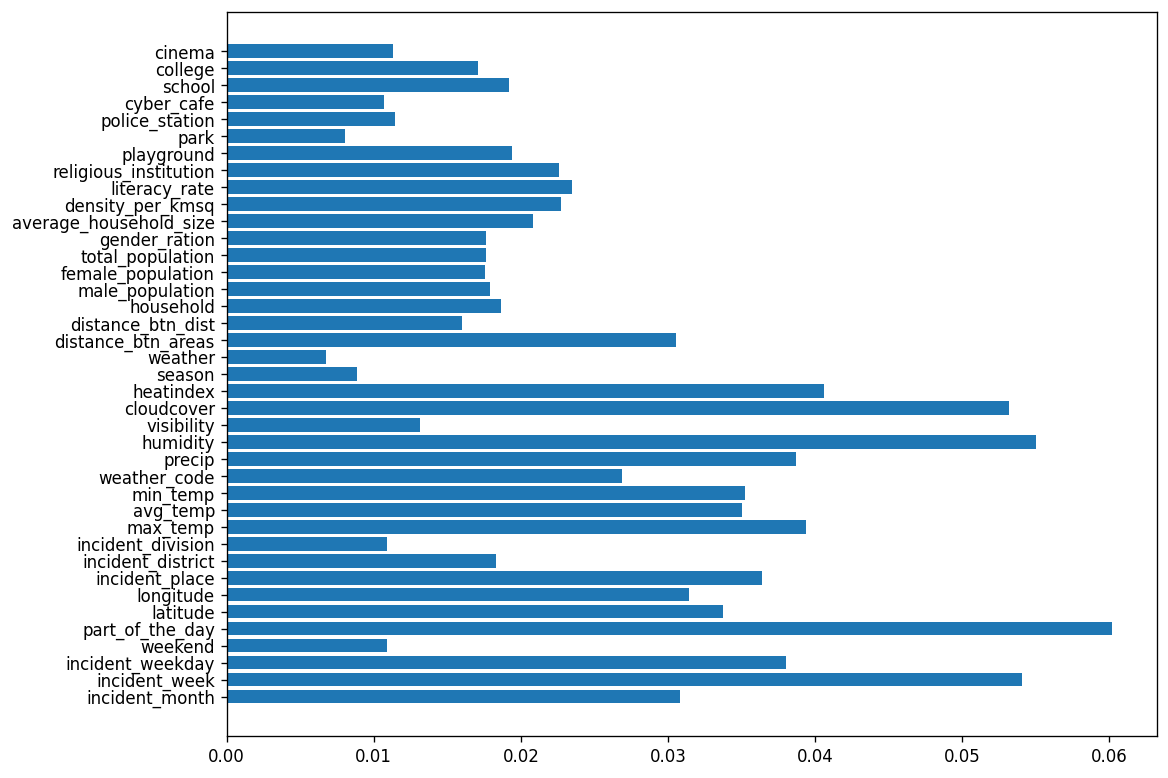

In [21]:
print("Feature Importance:")
from matplotlib.pyplot import figure
figure(figsize=(10, 8), dpi=120)
plt.barh(X.columns, classifier.feature_importances_)

In [22]:
y_pred = classifier.predict(X_test)
y_train_pred = classifier.predict(X_train)
print("***************************** Test Performance: *****************************\n")
ModelPerformance(y_test,y_pred)
print("\n***************************** Train Performance: *****************************\n")
ModelPerformance(y_train,y_train_pred)

***************************** Test Performance: *****************************

Confusion Matrix:
[[43 23 33 23]
 [25 89 28 15]
 [14 26 92 14]
 [10 15 39 44]]

Accuracy per Class:
Assault: 35.24590163934426
BodyFound: 56.68789808917197
Murder: 63.013698630136986
Rape: 40.74074074074074

Accuracy: 0.50

Micro Precision: 0.50
Micro Recall: 0.50
Micro F1-score: 0.50

Macro Precision: 0.50
Macro Recall: 0.49
Macro F1-score: 0.49

Weighted Precision: 0.50
Weighted Recall: 0.50
Weighted F1-score: 0.50
Classification Report

              precision    recall  f1-score   support

     Assault       0.47      0.35      0.40       122
   BodyFound       0.58      0.57      0.57       157
      Murder       0.48      0.63      0.54       146
        Rape       0.46      0.41      0.43       108

    accuracy                           0.50       533
   macro avg       0.50      0.49      0.49       533
weighted avg       0.50      0.50      0.50       533


***************************** Train Perfo

### Random Forest: max_depth = 30, min_sample_leaf = 10

In [23]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 2000, max_depth = 10, min_samples_leaf = 5, criterion = 'gini', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=2000,
                       random_state=0)

Feature Importance:


<BarContainer object of 39 artists>

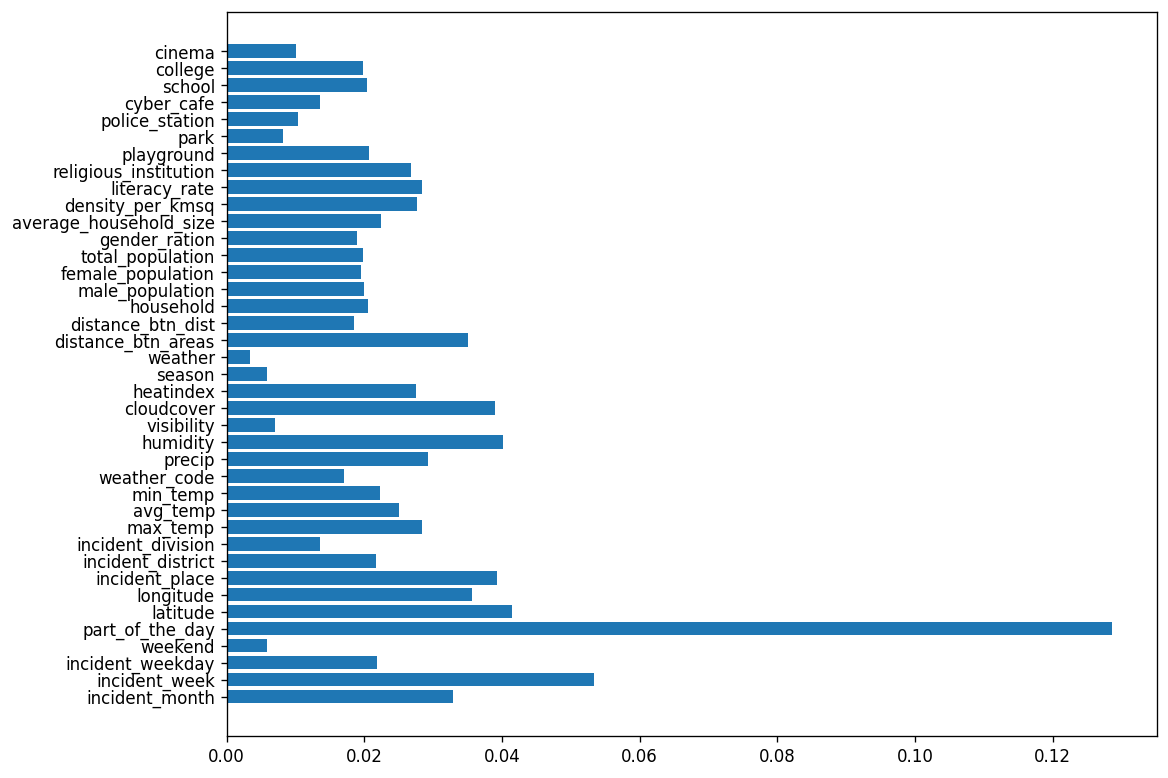

In [24]:
print("Feature Importance:")
from matplotlib.pyplot import figure
figure(figsize=(10, 8), dpi=120)
plt.barh(X.columns, classifier.feature_importances_)

In [25]:
y_pred = classifier.predict(X_test)
y_train_pred = classifier.predict(X_train)
print("***************************** Test Performance: *****************************\n")
ModelPerformance(y_test,y_pred)
print("\n***************************** Train Performance: *****************************\n")
ModelPerformance(y_train,y_train_pred)

***************************** Test Performance: *****************************

Confusion Matrix:
[[ 29  27  43  23]
 [ 12 108  26  11]
 [  4  32 100  10]
 [  5  21  42  40]]

Accuracy per Class:
Assault: 23.770491803278688
BodyFound: 68.78980891719745
Murder: 68.4931506849315
Rape: 37.03703703703704

Accuracy: 0.52

Micro Precision: 0.52
Micro Recall: 0.52
Micro F1-score: 0.52

Macro Precision: 0.53
Macro Recall: 0.50
Macro F1-score: 0.49

Weighted Precision: 0.53
Weighted Recall: 0.52
Weighted F1-score: 0.50
Classification Report

              precision    recall  f1-score   support

     Assault       0.58      0.24      0.34       122
   BodyFound       0.57      0.69      0.63       157
      Murder       0.47      0.68      0.56       146
        Rape       0.48      0.37      0.42       108

    accuracy                           0.52       533
   macro avg       0.53      0.50      0.49       533
weighted avg       0.53      0.52      0.50       533


**************************

### XGBoost

Feature Importance:


<BarContainer object of 39 artists>

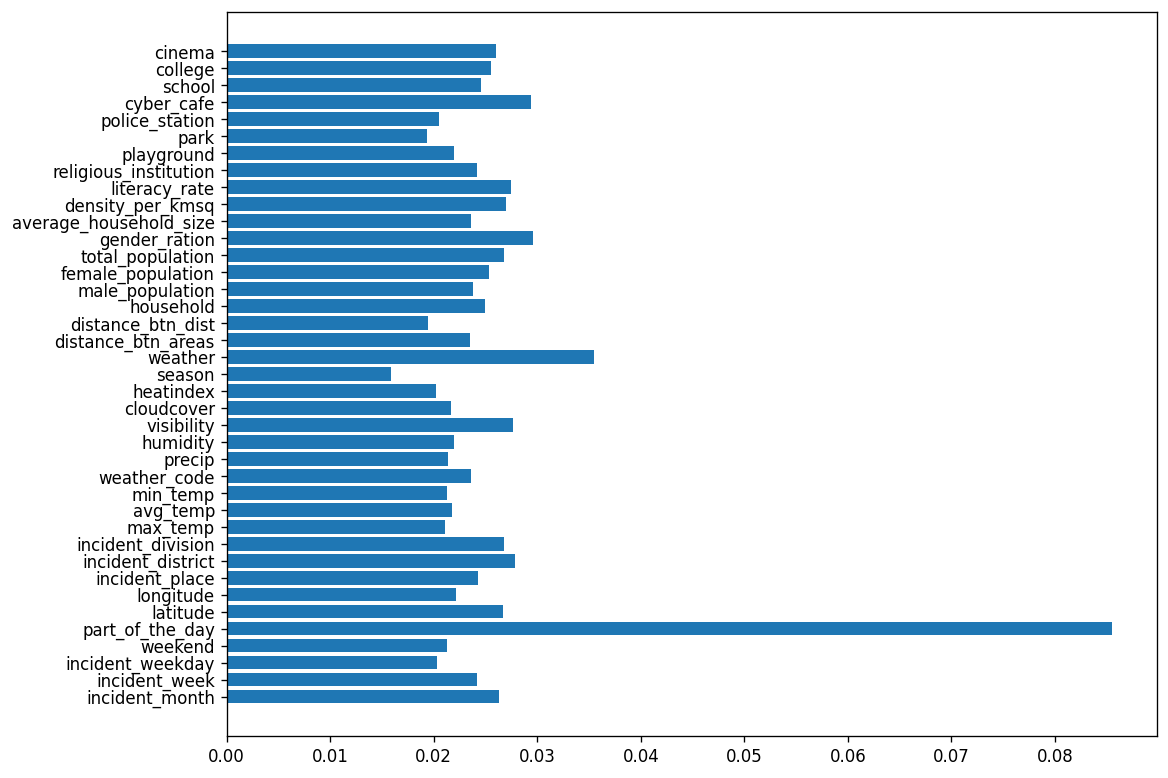

In [26]:
from xgboost import XGBClassifier
classifier = XGBClassifier(n_estimators = 100,learning_rate=0.3,max_depth = 10)
classifier.fit(X_train, y_train)
print("Feature Importance:")
from matplotlib.pyplot import figure
figure(figsize=(10, 8), dpi=120)
plt.barh(X.columns, classifier.feature_importances_)

In [27]:
y_pred = classifier.predict(X_test)
y_train_pred = classifier.predict(X_train)
print("Test Performance: \n")
ModelPerformance(y_test,y_pred)
print("\nTrain Performance: \n")
ModelPerformance(y_train,y_train_pred)

Test Performance: 

Confusion Matrix:
[[44 26 26 26]
 [26 81 37 13]
 [15 22 91 18]
 [15 15 33 45]]

Accuracy per Class:
Assault: 36.0655737704918
BodyFound: 51.59235668789809
Murder: 62.328767123287676
Rape: 41.66666666666667

Accuracy: 0.49

Micro Precision: 0.49
Micro Recall: 0.49
Micro F1-score: 0.49

Macro Precision: 0.48
Macro Recall: 0.48
Macro F1-score: 0.48

Weighted Precision: 0.49
Weighted Recall: 0.49
Weighted F1-score: 0.49
Classification Report

              precision    recall  f1-score   support

     Assault       0.44      0.36      0.40       122
   BodyFound       0.56      0.52      0.54       157
      Murder       0.49      0.62      0.55       146
        Rape       0.44      0.42      0.43       108

    accuracy                           0.49       533
   macro avg       0.48      0.48      0.48       533
weighted avg       0.49      0.49      0.49       533


Train Performance: 

Confusion Matrix:
[[ 973    0    1    1]
 [   1 1354    4    1]
 [   2    1 1364

### SVM

In [28]:
def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()
from sklearn import svm

#### RBF

In [29]:
classifier_rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo').fit(X_train, y_train)

In [30]:
y_pred = classifier_rbf.predict(X_test)
y_train_pred = classifier_rbf.predict(X_train)
print("Test Performance: \n")
ModelPerformance(y_test,y_pred)
print("\nTrain Performance: \n")
ModelPerformance(y_train,y_train_pred)

Test Performance: 

Confusion Matrix:
[[  9 102   7   4]
 [  2 145   9   1]
 [  1 112  32   1]
 [  1  88   7  12]]

Accuracy per Class:
Assault: 7.377049180327869
BodyFound: 92.35668789808918
Murder: 21.91780821917808
Rape: 11.11111111111111

Accuracy: 0.37

Micro Precision: 0.37
Micro Recall: 0.37
Micro F1-score: 0.37

Macro Precision: 0.57
Macro Recall: 0.33
Macro F1-score: 0.28

Weighted Precision: 0.55
Weighted Recall: 0.37
Weighted F1-score: 0.30
Classification Report

              precision    recall  f1-score   support

     Assault       0.69      0.07      0.13       122
   BodyFound       0.32      0.92      0.48       157
      Murder       0.58      0.22      0.32       146
        Rape       0.67      0.11      0.19       108

    accuracy                           0.37       533
   macro avg       0.57      0.33      0.28       533
weighted avg       0.55      0.37      0.30       533


Train Performance: 

Confusion Matrix:
[[ 966    3    4    2]
 [   0 1358    2    0]


#### Poly

In [31]:
classifier_poly = svm.SVC(kernel='poly', degree=10, C=1, decision_function_shape='ovo').fit(X_train, y_train)

In [32]:
y_pred = classifier_poly.predict(X_test)
y_train_pred = classifier_poly.predict(X_train)
print("Test Performance: \n")
ModelPerformance(y_test,y_pred)
print("\nTrain Performance: \n")
ModelPerformance(y_train,y_train_pred)

Test Performance: 

Confusion Matrix:
[[  5   9 108   0]
 [  4  18 134   1]
 [  1   2 142   1]
 [  1   8  98   1]]

Accuracy per Class:
Assault: 4.098360655737705
BodyFound: 11.464968152866243
Murder: 97.26027397260275
Rape: 0.9259259259259258

Accuracy: 0.31

Micro Precision: 0.31
Micro Recall: 0.31
Micro F1-score: 0.31

Macro Precision: 0.39
Macro Recall: 0.28
Macro F1-score: 0.18

Weighted Precision: 0.40
Weighted Recall: 0.31
Weighted F1-score: 0.20
Classification Report

              precision    recall  f1-score   support

     Assault       0.45      0.04      0.08       122
   BodyFound       0.49      0.11      0.19       157
      Murder       0.29      0.97      0.45       146
        Rape       0.33      0.01      0.02       108

    accuracy                           0.31       533
   macro avg       0.39      0.28      0.18       533
weighted avg       0.40      0.31      0.20       533


Train Performance: 

Confusion Matrix:
[[  56   43  861   15]
 [  37  150 1167    6

#### Sigmoid

In [33]:
classifier_sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo').fit(X_train, y_train)

In [34]:
y_pred = classifier_sig.predict(X_test)
y_train_pred = classifier_sig.predict(X_train)
print("Test Performance: \n")
ModelPerformance(y_test,y_pred)
print("\nTrain Performance: \n")
ModelPerformance(y_train,y_train_pred)

Test Performance: 

Confusion Matrix:
[[47  7  8 60]
 [55 14  8 80]
 [61 14 13 58]
 [43  7 12 46]]

Accuracy per Class:
Assault: 38.52459016393443
BodyFound: 8.9171974522293
Murder: 8.904109589041095
Rape: 42.592592592592595

Accuracy: 0.23

Micro Precision: 0.23
Micro Recall: 0.23
Micro F1-score: 0.23

Macro Precision: 0.27
Macro Recall: 0.25
Macro F1-score: 0.21

Weighted Precision: 0.28
Weighted Recall: 0.23
Weighted F1-score: 0.20
Classification Report

              precision    recall  f1-score   support

     Assault       0.23      0.39      0.29       122
   BodyFound       0.33      0.09      0.14       157
      Murder       0.32      0.09      0.14       146
        Rape       0.19      0.43      0.26       108

    accuracy                           0.23       533
   macro avg       0.27      0.25      0.21       533
weighted avg       0.28      0.23      0.20       533


Train Performance: 

Confusion Matrix:
[[450  73  55 397]
 [540 143  87 590]
 [514 143 125 590]
 [436 

#### Linear

In [35]:
# classifier_linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(X_train, y_train)

In [36]:
# y_pred = classifier_linear.predict(X_test)
# y_train_pred = classifier_linear.predict(X_train)
# print("Test Performance: \n")
# ModelPerformance(y_test,y_pred)
# print("\nTrain Performance: \n")
# ModelPerformance(y_train,y_train_pred)

### Naive Bayes

In [37]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [38]:
y_pred = classifier.predict(X_test)
y_train_pred = classifier.predict(X_train)
print("Test Performance: \n")
ModelPerformance(y_test,y_pred)
print("\nTrain Performance: \n")
ModelPerformance(y_train,y_train_pred)

Test Performance: 

Confusion Matrix:
[[  1  17  75  29]
 [  0  28  88  41]
 [  0   9 113  24]
 [  1  12  61  34]]

Accuracy per Class:
Assault: 0.819672131147541
BodyFound: 17.8343949044586
Murder: 77.3972602739726
Rape: 31.48148148148148

Accuracy: 0.33

Micro Precision: 0.33
Micro Recall: 0.33
Micro F1-score: 0.33

Macro Precision: 0.38
Macro Recall: 0.32
Macro F1-score: 0.26

Weighted Precision: 0.39
Weighted Recall: 0.33
Weighted F1-score: 0.26
Classification Report

              precision    recall  f1-score   support

     Assault       0.50      0.01      0.02       122
   BodyFound       0.42      0.18      0.25       157
      Murder       0.34      0.77      0.47       146
        Rape       0.27      0.31      0.29       108

    accuracy                           0.33       533
   macro avg       0.38      0.32      0.26       533
weighted avg       0.39      0.33      0.26       533


Train Performance: 

Confusion Matrix:
[[ 19 183 553 220]
 [ 12 275 705 368]
 [  7 161 

### Decision Tree

Feature Importance:


<BarContainer object of 39 artists>

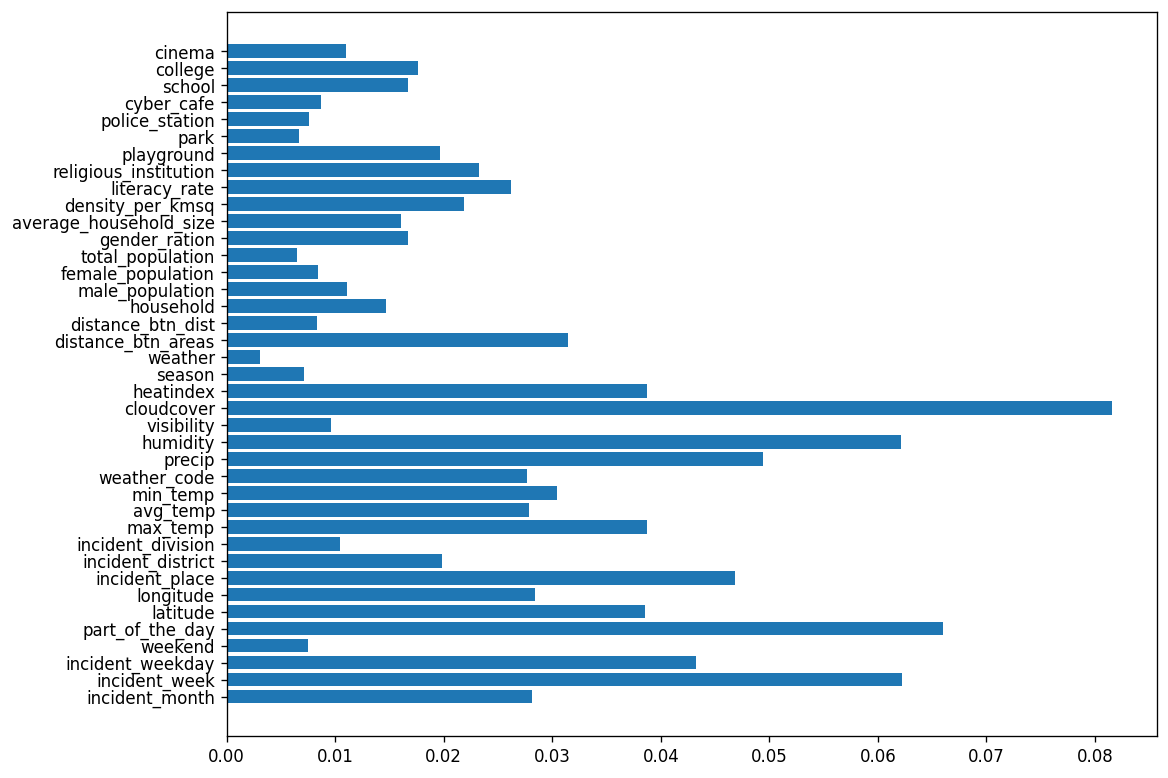

In [39]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth = 20,criterion = 'gini')
classifier.fit(X_train, y_train)
from matplotlib.pyplot import figure
figure(figsize=(10, 8), dpi=120)
print("Feature Importance:")
plt.barh(X.columns, classifier.feature_importances_)

In [40]:
y_pred = classifier.predict(X_test)
y_train_pred = classifier.predict(X_train)
print("Test Performance: \n")
ModelPerformance(y_test,y_pred)
print("\nTrain Performance: \n")
ModelPerformance(y_train,y_train_pred)

Test Performance: 

Confusion Matrix:
[[42 26 27 27]
 [28 68 34 27]
 [23 25 75 23]
 [18 17 38 35]]

Accuracy per Class:
Assault: 34.42622950819672
BodyFound: 43.31210191082803
Murder: 51.369863013698634
Rape: 32.407407407407405

Accuracy: 0.41

Micro Precision: 0.41
Micro Recall: 0.41
Micro F1-score: 0.41

Macro Precision: 0.41
Macro Recall: 0.40
Macro F1-score: 0.40

Weighted Precision: 0.42
Weighted Recall: 0.41
Weighted F1-score: 0.41
Classification Report

              precision    recall  f1-score   support

     Assault       0.38      0.34      0.36       122
   BodyFound       0.50      0.43      0.46       157
      Murder       0.43      0.51      0.47       146
        Rape       0.31      0.32      0.32       108

    accuracy                           0.41       533
   macro avg       0.41      0.40      0.40       533
weighted avg       0.42      0.41      0.41       533


Train Performance: 

Confusion Matrix:
[[ 956    4   10    5]
 [  10 1341    7    2]
 [  12    8 13

### Ada-Boost

In [41]:
classifier = AdaBoostClassifier(n_estimators=50, learning_rate=1)
classifier.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1)

In [42]:
y_pred = classifier.predict(X_test)
y_train_pred = classifier.predict(X_train)
print("Test Performance: \n")
ModelPerformance(y_test,y_pred)
print("\nTrain Performance: \n")
ModelPerformance(y_train,y_train_pred)

Test Performance: 

Confusion Matrix:
[[27 33 39 23]
 [16 95 31 15]
 [ 9 29 91 17]
 [11 18 47 32]]

Accuracy per Class:
Assault: 22.131147540983605
BodyFound: 60.509554140127385
Murder: 62.328767123287676
Rape: 29.629629629629626

Accuracy: 0.46

Micro Precision: 0.46
Micro Recall: 0.46
Micro F1-score: 0.46

Macro Precision: 0.44
Macro Recall: 0.44
Macro F1-score: 0.43

Weighted Precision: 0.45
Weighted Recall: 0.46
Weighted F1-score: 0.44
Classification Report

              precision    recall  f1-score   support

     Assault       0.43      0.22      0.29       122
   BodyFound       0.54      0.61      0.57       157
      Murder       0.44      0.62      0.51       146
        Rape       0.37      0.30      0.33       108

    accuracy                           0.46       533
   macro avg       0.44      0.44      0.43       533
weighted avg       0.45      0.46      0.44       533


Train Performance: 

Confusion Matrix:
[[254 286 264 171]
 [125 813 272 150]
 [ 98 269 800 205]
 

### Extra-Tree

In [43]:
classifier = ExtraTreesClassifier(n_estimators=100, random_state=0)
classifier.fit(X_train, y_train)

ExtraTreesClassifier(random_state=0)

In [44]:
y_pred = classifier.predict(X_test)
y_train_pred = classifier.predict(X_train)
print("Test Performance: \n")
ModelPerformance(y_test,y_pred)
print("\nTrain Performance: \n")
ModelPerformance(y_train,y_train_pred)

Test Performance: 

Confusion Matrix:
[[50 19 31 22]
 [26 80 36 15]
 [16 25 88 17]
 [12 22 33 41]]

Accuracy per Class:
Assault: 40.98360655737705
BodyFound: 50.955414012738856
Murder: 60.273972602739725
Rape: 37.96296296296296

Accuracy: 0.49

Micro Precision: 0.49
Micro Recall: 0.49
Micro F1-score: 0.49

Macro Precision: 0.48
Macro Recall: 0.48
Macro F1-score: 0.48

Weighted Precision: 0.49
Weighted Recall: 0.49
Weighted F1-score: 0.48
Classification Report

              precision    recall  f1-score   support

     Assault       0.48      0.41      0.44       122
   BodyFound       0.55      0.51      0.53       157
      Murder       0.47      0.60      0.53       146
        Rape       0.43      0.38      0.40       108

    accuracy                           0.49       533
   macro avg       0.48      0.48      0.48       533
weighted avg       0.49      0.49      0.48       533


Train Performance: 

Confusion Matrix:
[[ 975    0    0    0]
 [   2 1356    2    0]
 [   3    3 13

## After Removing Low Important Feature

In [45]:
feature_drop = ['weekend', 'incident_division', 'visibility', 'season', 'weather', 'playground', 'park', 'police_station', 'cyber_cafe', 'cinema']
X,y = PrepareDataset(df, feature_drop)
X_train, X_test, y_train, y_test = SplitDataset(X,y, test_size = .10)

### Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 2000 ,criterion = 'gini', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=2000, random_state=0)

Feature Importance:


<BarContainer object of 29 artists>

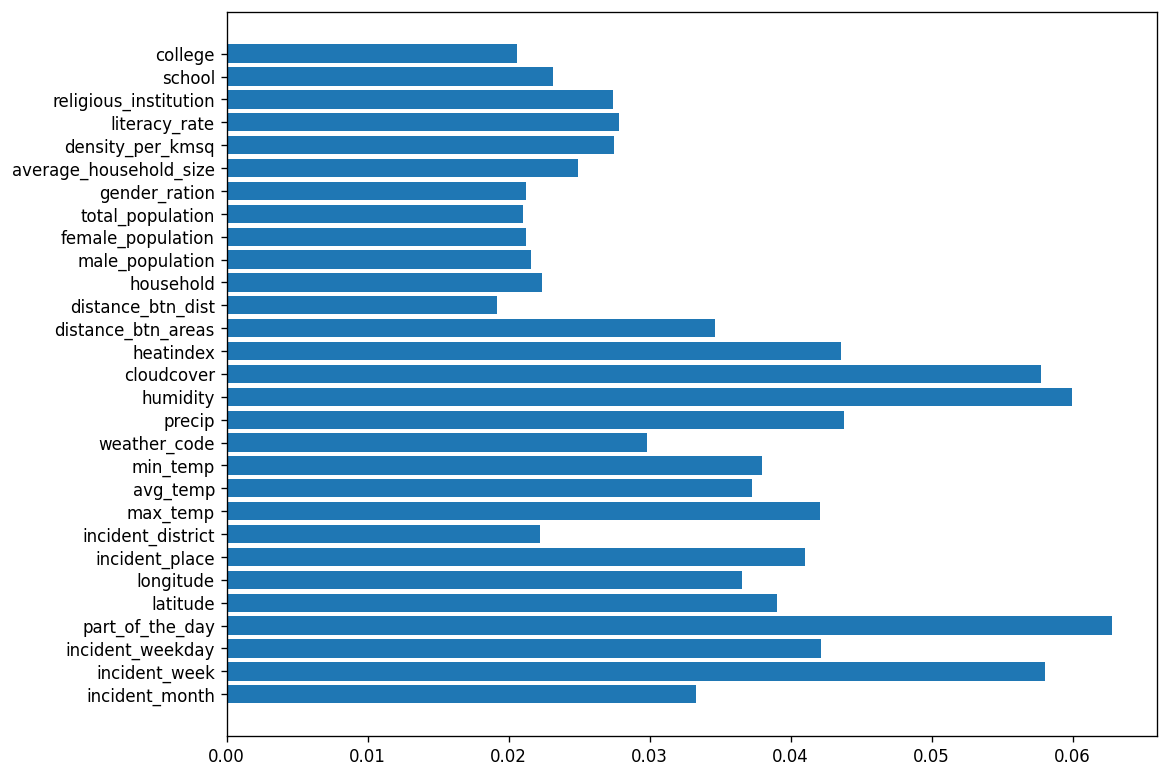

In [47]:
print("Feature Importance:")
from matplotlib.pyplot import figure
figure(figsize=(10, 8), dpi=120)
plt.barh(X.columns, classifier.feature_importances_)

In [48]:
y_pred = classifier.predict(X_test)
y_train_pred = classifier.predict(X_train)
print("***************************** Test Performance: *****************************\n")
ModelPerformance(y_test,y_pred)
print("\n***************************** Train Performance: *****************************\n")
ModelPerformance(y_train,y_train_pred)

***************************** Test Performance: *****************************

Confusion Matrix:
[[43 22 36 21]
 [19 93 32 13]
 [16 24 93 13]
 [ 9 16 35 48]]

Accuracy per Class:
Assault: 35.24590163934426
BodyFound: 59.23566878980891
Murder: 63.6986301369863
Rape: 44.44444444444444

Accuracy: 0.52

Micro Precision: 0.52
Micro Recall: 0.52
Micro F1-score: 0.52

Macro Precision: 0.52
Macro Recall: 0.51
Macro F1-score: 0.51

Weighted Precision: 0.52
Weighted Recall: 0.52
Weighted F1-score: 0.51
Classification Report

              precision    recall  f1-score   support

     Assault       0.49      0.35      0.41       122
   BodyFound       0.60      0.59      0.60       157
      Murder       0.47      0.64      0.54       146
        Rape       0.51      0.44      0.47       108

    accuracy                           0.52       533
   macro avg       0.52      0.51      0.51       533
weighted avg       0.52      0.52      0.51       533


***************************** Train Perform

### XGBoost

Feature Importance:


<BarContainer object of 29 artists>

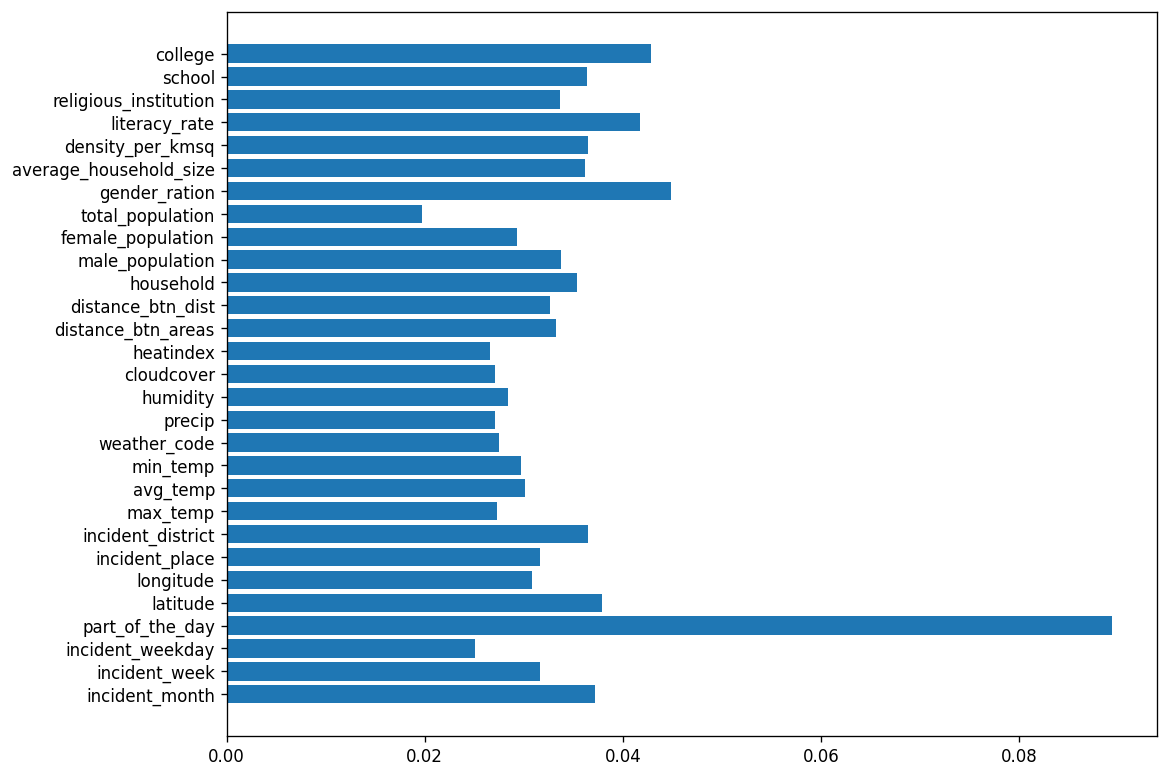

In [49]:
from xgboost import XGBClassifier
classifier = XGBClassifier(n_estimators = 1000)
classifier.fit(X_train, y_train)
print("Feature Importance:")
from matplotlib.pyplot import figure
figure(figsize=(10, 8), dpi=120)
plt.barh(X.columns, classifier.feature_importances_)

In [50]:
y_pred = classifier.predict(X_test)
y_train_pred = classifier.predict(X_train)
print("Test Performance: \n")
ModelPerformance(y_test,y_pred)
print("\nTrain Performance: \n")
ModelPerformance(y_train,y_train_pred)

Test Performance: 

Confusion Matrix:
[[38 26 30 28]
 [23 87 31 16]
 [17 22 87 20]
 [15 16 38 39]]

Accuracy per Class:
Assault: 31.147540983606557
BodyFound: 55.4140127388535
Murder: 59.589041095890416
Rape: 36.11111111111111

Accuracy: 0.47

Micro Precision: 0.47
Micro Recall: 0.47
Micro F1-score: 0.47

Macro Precision: 0.46
Macro Recall: 0.46
Macro F1-score: 0.45

Weighted Precision: 0.47
Weighted Recall: 0.47
Weighted F1-score: 0.47
Classification Report

              precision    recall  f1-score   support

     Assault       0.41      0.31      0.35       122
   BodyFound       0.58      0.55      0.56       157
      Murder       0.47      0.60      0.52       146
        Rape       0.38      0.36      0.37       108

    accuracy                           0.47       533
   macro avg       0.46      0.46      0.45       533
weighted avg       0.47      0.47      0.47       533


Train Performance: 

Confusion Matrix:
[[ 973    2    0    0]
 [   0 1358    2    0]
 [   3    3 136

### SVM

In [51]:
def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()
from sklearn import svm

#### RBF

In [52]:
classifier_rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo').fit(X_train, y_train)

In [53]:
y_pred = classifier_rbf.predict(X_test)
y_train_pred = classifier_rbf.predict(X_train)
print("Test Performance: \n")
ModelPerformance(y_test,y_pred)
print("\nTrain Performance: \n")
ModelPerformance(y_train,y_train_pred)

Test Performance: 

Confusion Matrix:
[[ 10 101   7   4]
 [  2 145   9   1]
 [  1 111  33   1]
 [  1  88   7  12]]

Accuracy per Class:
Assault: 8.19672131147541
BodyFound: 92.35668789808918
Murder: 22.602739726027394
Rape: 11.11111111111111

Accuracy: 0.38

Micro Precision: 0.38
Micro Recall: 0.38
Micro F1-score: 0.38

Macro Precision: 0.57
Macro Recall: 0.34
Macro F1-score: 0.29

Weighted Precision: 0.56
Weighted Recall: 0.38
Weighted F1-score: 0.30
Classification Report

              precision    recall  f1-score   support

     Assault       0.71      0.08      0.15       122
   BodyFound       0.33      0.92      0.48       157
      Murder       0.59      0.23      0.33       146
        Rape       0.67      0.11      0.19       108

    accuracy                           0.38       533
   macro avg       0.57      0.34      0.29       533
weighted avg       0.56      0.38      0.30       533


Train Performance: 

Confusion Matrix:
[[ 966    3    4    2]
 [   0 1358    2    0]


#### Poly

In [54]:
classifier_poly = svm.SVC(kernel='poly', degree=10, C=1, decision_function_shape='ovo').fit(X_train, y_train)

In [55]:
y_pred = classifier_poly.predict(X_test)
y_train_pred = classifier_poly.predict(X_train)
print("Test Performance: \n")
ModelPerformance(y_test,y_pred)
print("\nTrain Performance: \n")
ModelPerformance(y_train,y_train_pred)

Test Performance: 

Confusion Matrix:
[[  4   9 107   2]
 [  3  18 135   1]
 [  1   3 141   1]
 [  1  10  97   0]]

Accuracy per Class:
Assault: 3.278688524590164
BodyFound: 11.464968152866243
Murder: 96.57534246575342
Rape: 0.0

Accuracy: 0.31

Micro Precision: 0.31
Micro Recall: 0.31
Micro F1-score: 0.31

Macro Precision: 0.30
Macro Recall: 0.28
Macro F1-score: 0.17

Weighted Precision: 0.31
Weighted Recall: 0.31
Weighted F1-score: 0.19
Classification Report

              precision    recall  f1-score   support

     Assault       0.44      0.03      0.06       122
   BodyFound       0.45      0.11      0.18       157
      Murder       0.29      0.97      0.45       146
        Rape       0.00      0.00      0.00       108

    accuracy                           0.31       533
   macro avg       0.30      0.28      0.17       533
weighted avg       0.31      0.31      0.19       533


Train Performance: 

Confusion Matrix:
[[  48   56  858   13]
 [  32  140 1179    9]
 [  18   56 1

#### Sigmoid

In [56]:
classifier_sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo').fit(X_train, y_train)

In [57]:
y_pred = classifier_sig.predict(X_test)
y_train_pred = classifier_sig.predict(X_train)
print("Test Performance: \n")
ModelPerformance(y_test,y_pred)
print("\nTrain Performance: \n")
ModelPerformance(y_train,y_train_pred)

Test Performance: 

Confusion Matrix:
[[47  7  8 60]
 [55 14  8 80]
 [61 14 13 58]
 [43  7 11 47]]

Accuracy per Class:
Assault: 38.52459016393443
BodyFound: 8.9171974522293
Murder: 8.904109589041095
Rape: 43.51851851851852

Accuracy: 0.23

Micro Precision: 0.23
Micro Recall: 0.23
Micro F1-score: 0.23

Macro Precision: 0.27
Macro Recall: 0.25
Macro F1-score: 0.21

Weighted Precision: 0.28
Weighted Recall: 0.23
Weighted F1-score: 0.20
Classification Report

              precision    recall  f1-score   support

     Assault       0.23      0.39      0.29       122
   BodyFound       0.33      0.09      0.14       157
      Murder       0.33      0.09      0.14       146
        Rape       0.19      0.44      0.27       108

    accuracy                           0.23       533
   macro avg       0.27      0.25      0.21       533
weighted avg       0.28      0.23      0.20       533


Train Performance: 

Confusion Matrix:
[[450  74  54 397]
 [537 146  89 588]
 [512 145 125 590]
 [432 1

#### Linear

In [58]:
# classifier_linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(X_train, y_train)

In [59]:
# y_pred = classifier_linear.predict(X_test)
# y_train_pred = classifier_linear.predict(X_train)
# print("Test Performance: \n")
# ModelPerformance(y_test,y_pred)
# print("\nTrain Performance: \n")
# ModelPerformance(y_train,y_train_pred)

### Naive Bayes

In [60]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [61]:
y_pred = classifier.predict(X_test)
y_train_pred = classifier.predict(X_train)
print("Test Performance: \n")
ModelPerformance(y_test,y_pred)
print("\nTrain Performance: \n")
ModelPerformance(y_train,y_train_pred)

Test Performance: 

Confusion Matrix:
[[  1  17  75  29]
 [  0  27  86  44]
 [  0   9 115  22]
 [  2  10  67  29]]

Accuracy per Class:
Assault: 0.819672131147541
BodyFound: 17.197452229299362
Murder: 78.76712328767124
Rape: 26.851851851851855

Accuracy: 0.32

Micro Precision: 0.32
Micro Recall: 0.32
Micro F1-score: 0.32

Macro Precision: 0.33
Macro Recall: 0.31
Macro F1-score: 0.25

Weighted Precision: 0.34
Weighted Recall: 0.32
Weighted F1-score: 0.26
Classification Report

              precision    recall  f1-score   support

     Assault       0.33      0.01      0.02       122
   BodyFound       0.43      0.17      0.25       157
      Murder       0.34      0.79      0.47       146
        Rape       0.23      0.27      0.25       108

    accuracy                           0.32       533
   macro avg       0.33      0.31      0.25       533
weighted avg       0.34      0.32      0.26       533


Train Performance: 

Confusion Matrix:
[[ 21 180 524 250]
 [ 18 275 687 380]
 [ 14 

### Decision Tree

Feature Importance:


<BarContainer object of 29 artists>

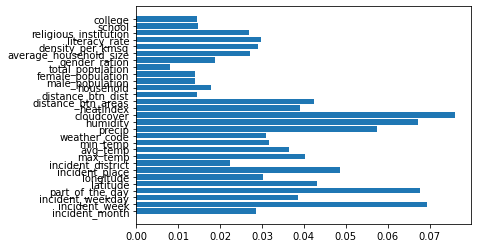

In [62]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth = 20,criterion = 'gini')
classifier.fit(X_train, y_train)
print("Feature Importance:")
plt.barh(X.columns, classifier.feature_importances_)

In [63]:
y_pred = classifier.predict(X_test)
y_train_pred = classifier.predict(X_train)
print("Test Performance: \n")
ModelPerformance(y_test,y_pred)
print("\nTrain Performance: \n")
ModelPerformance(y_train,y_train_pred)

Test Performance: 

Confusion Matrix:
[[42 21 35 24]
 [36 64 30 27]
 [30 19 78 19]
 [19 17 39 33]]

Accuracy per Class:
Assault: 34.42622950819672
BodyFound: 40.76433121019109
Murder: 53.42465753424658
Rape: 30.555555555555557

Accuracy: 0.41

Micro Precision: 0.41
Micro Recall: 0.41
Micro F1-score: 0.41

Macro Precision: 0.40
Macro Recall: 0.40
Macro F1-score: 0.40

Weighted Precision: 0.41
Weighted Recall: 0.41
Weighted F1-score: 0.41
Classification Report

              precision    recall  f1-score   support

     Assault       0.33      0.34      0.34       122
   BodyFound       0.53      0.41      0.46       157
      Murder       0.43      0.53      0.48       146
        Rape       0.32      0.31      0.31       108

    accuracy                           0.41       533
   macro avg       0.40      0.40      0.40       533
weighted avg       0.41      0.41      0.41       533


Train Performance: 

Confusion Matrix:
[[ 957    7    6    5]
 [  10 1334   14    2]
 [  11    7 134

### Ada-Boost

In [64]:
classifier = AdaBoostClassifier(n_estimators=50, learning_rate=1)
classifier.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1)

In [65]:
y_pred = classifier.predict(X_test)
y_train_pred = classifier.predict(X_train)
print("Test Performance: \n")
ModelPerformance(y_test,y_pred)
print("\nTrain Performance: \n")
ModelPerformance(y_train,y_train_pred)

Test Performance: 

Confusion Matrix:
[[22 33 40 27]
 [13 93 34 17]
 [ 8 32 85 21]
 [14 15 48 31]]

Accuracy per Class:
Assault: 18.0327868852459
BodyFound: 59.23566878980891
Murder: 58.21917808219178
Rape: 28.703703703703702

Accuracy: 0.43

Micro Precision: 0.43
Micro Recall: 0.43
Micro F1-score: 0.43

Macro Precision: 0.41
Macro Recall: 0.41
Macro F1-score: 0.40

Weighted Precision: 0.42
Weighted Recall: 0.43
Weighted F1-score: 0.42
Classification Report

              precision    recall  f1-score   support

     Assault       0.39      0.18      0.25       122
   BodyFound       0.54      0.59      0.56       157
      Murder       0.41      0.58      0.48       146
        Rape       0.32      0.29      0.30       108

    accuracy                           0.43       533
   macro avg       0.41      0.41      0.40       533
weighted avg       0.42      0.43      0.42       533


Train Performance: 

Confusion Matrix:
[[225 307 266 177]
 [115 822 276 147]
 [109 263 778 222]
 [ 93

### Extra-Tree

In [66]:
classifier = ExtraTreesClassifier(n_estimators=100, random_state=0)
classifier.fit(X_train, y_train)

ExtraTreesClassifier(random_state=0)

In [67]:
y_pred = classifier.predict(X_test)
y_train_pred = classifier.predict(X_train)
print("Test Performance: \n")
ModelPerformance(y_test,y_pred)
print("\nTrain Performance: \n")
ModelPerformance(y_train,y_train_pred)

Test Performance: 

Confusion Matrix:
[[43 21 40 18]
 [23 85 32 17]
 [17 23 92 14]
 [13 15 37 43]]

Accuracy per Class:
Assault: 35.24590163934426
BodyFound: 54.14012738853503
Murder: 63.013698630136986
Rape: 39.81481481481482

Accuracy: 0.49

Micro Precision: 0.49
Micro Recall: 0.49
Micro F1-score: 0.49

Macro Precision: 0.49
Macro Recall: 0.48
Macro F1-score: 0.48

Weighted Precision: 0.50
Weighted Recall: 0.49
Weighted F1-score: 0.49
Classification Report

              precision    recall  f1-score   support

     Assault       0.45      0.35      0.39       122
   BodyFound       0.59      0.54      0.56       157
      Murder       0.46      0.63      0.53       146
        Rape       0.47      0.40      0.43       108

    accuracy                           0.49       533
   macro avg       0.49      0.48      0.48       533
weighted avg       0.50      0.49      0.49       533


Train Performance: 

Confusion Matrix:
[[ 975    0    0    0]
 [   2 1356    2    0]
 [   3    3 136

## After Removing Weather Feature

In [68]:
feature_drop = ['weekend', 'incident_division', 'visibility', 'season', 'weather', 'playground', 'park', 'police_station', 'cyber_cafe', 'cinema', 'max_temp', 'avg_temp',
       'min_temp', 'weather_code', 'precip', 'humidity', 'cloudcover', 'heatindex']
X,y = PrepareDataset(df, feature_drop)
X_train, X_test, y_train, y_test = SplitDataset(X,y, test_size = .10)

### Random Forest

In [69]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 2000 ,criterion = 'gini', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=2000, random_state=0)

Feature Importance:


<BarContainer object of 21 artists>

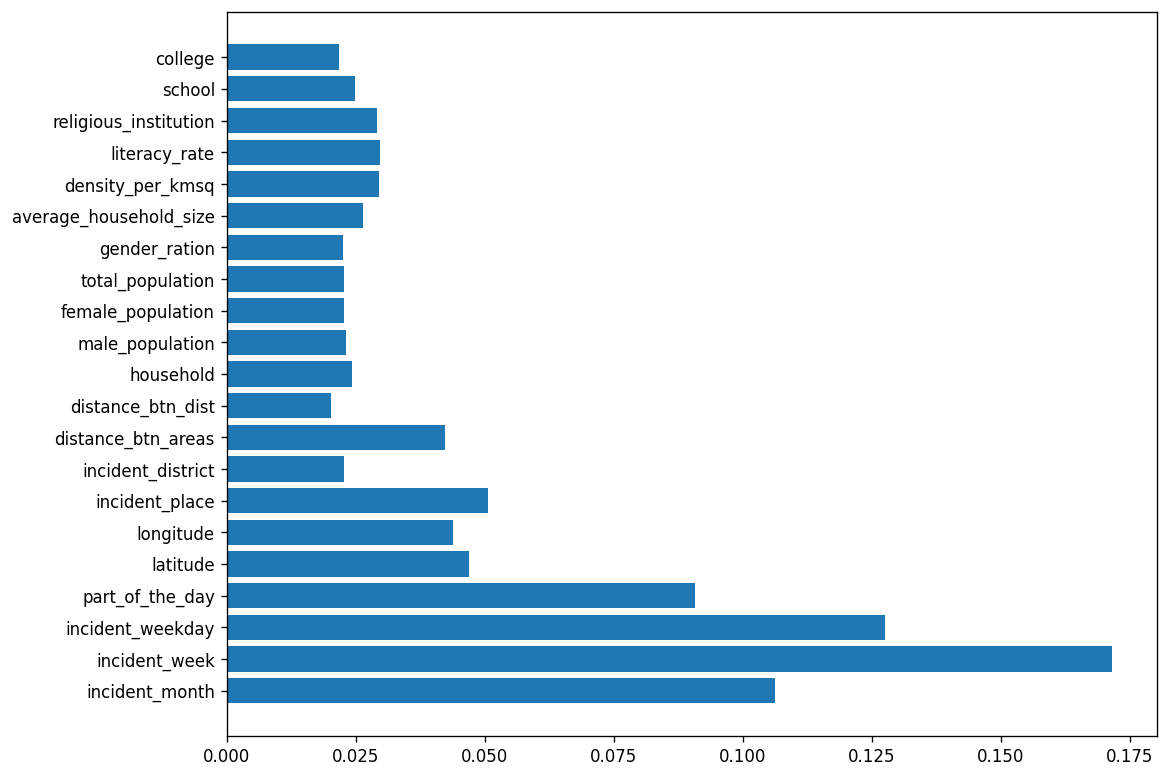

In [70]:
print("Feature Importance:")
from matplotlib.pyplot import figure
figure(figsize=(10, 8), dpi=120)
plt.barh(X.columns, classifier.feature_importances_)

In [71]:
y_pred = classifier.predict(X_test)
y_train_pred = classifier.predict(X_train)
print("***************************** Test Performance: *****************************\n")
ModelPerformance(y_test,y_pred)
print("\n***************************** Train Performance: *****************************\n")
ModelPerformance(y_train,y_train_pred)

***************************** Test Performance: *****************************

Confusion Matrix:
[[51 23 27 21]
 [25 82 27 23]
 [20 29 80 17]
 [16 16 32 44]]

Accuracy per Class:
Assault: 41.80327868852459
BodyFound: 52.22929936305732
Murder: 54.794520547945204
Rape: 40.74074074074074

Accuracy: 0.48

Micro Precision: 0.48
Micro Recall: 0.48
Micro F1-score: 0.48

Macro Precision: 0.48
Macro Recall: 0.47
Macro F1-score: 0.47

Weighted Precision: 0.48
Weighted Recall: 0.48
Weighted F1-score: 0.48
Classification Report

              precision    recall  f1-score   support

     Assault       0.46      0.42      0.44       122
   BodyFound       0.55      0.52      0.53       157
      Murder       0.48      0.55      0.51       146
        Rape       0.42      0.41      0.41       108

    accuracy                           0.48       533
   macro avg       0.48      0.47      0.47       533
weighted avg       0.48      0.48      0.48       533


***************************** Train Perfo

### XGBoost

Feature Importance:


<BarContainer object of 21 artists>

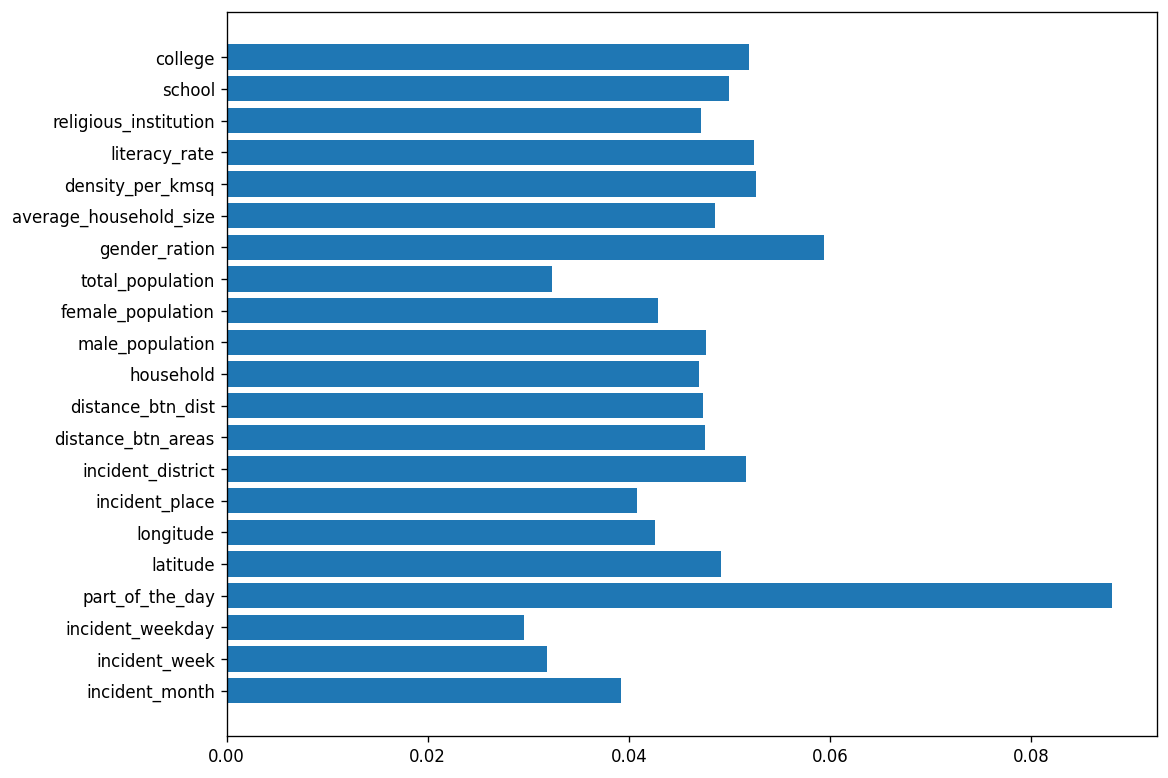

In [72]:
from xgboost import XGBClassifier
classifier = XGBClassifier(n_estimators = 1000)
classifier.fit(X_train, y_train)
print("Feature Importance:")
from matplotlib.pyplot import figure
figure(figsize=(10, 8), dpi=120)
plt.barh(X.columns, classifier.feature_importances_)

In [73]:
y_pred = classifier.predict(X_test)
y_train_pred = classifier.predict(X_train)
print("Test Performance: \n")
ModelPerformance(y_test,y_pred)
print("\nTrain Performance: \n")
ModelPerformance(y_train,y_train_pred)

Test Performance: 

Confusion Matrix:
[[44 21 32 25]
 [34 76 28 19]
 [18 28 77 23]
 [17 22 27 42]]

Accuracy per Class:
Assault: 36.0655737704918
BodyFound: 48.40764331210191
Murder: 52.73972602739726
Rape: 38.88888888888889

Accuracy: 0.45

Micro Precision: 0.45
Micro Recall: 0.45
Micro F1-score: 0.45

Macro Precision: 0.44
Macro Recall: 0.44
Macro F1-score: 0.44

Weighted Precision: 0.45
Weighted Recall: 0.45
Weighted F1-score: 0.45
Classification Report

              precision    recall  f1-score   support

     Assault       0.39      0.36      0.37       122
   BodyFound       0.52      0.48      0.50       157
      Murder       0.47      0.53      0.50       146
        Rape       0.39      0.39      0.39       108

    accuracy                           0.45       533
   macro avg       0.44      0.44      0.44       533
weighted avg       0.45      0.45      0.45       533


Train Performance: 

Confusion Matrix:
[[ 964    4    5    2]
 [   2 1349    4    5]
 [   1    6 1358 

### SVM

In [74]:
def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()
from sklearn import svm

#### RBF

In [75]:
classifier_rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo').fit(X_train, y_train)

In [76]:
y_pred = classifier_rbf.predict(X_test)
y_train_pred = classifier_rbf.predict(X_train)
print("Test Performance: \n")
ModelPerformance(y_test,y_pred)
print("\nTrain Performance: \n")
ModelPerformance(y_train,y_train_pred)

Test Performance: 

Confusion Matrix:
[[ 13  94  10   5]
 [  4 132  17   4]
 [  2 105  38   1]
 [  1  85   8  14]]

Accuracy per Class:
Assault: 10.655737704918032
BodyFound: 84.07643312101911
Murder: 26.027397260273972
Rape: 12.962962962962962

Accuracy: 0.37

Micro Precision: 0.37
Micro Recall: 0.37
Micro F1-score: 0.37

Macro Precision: 0.52
Macro Recall: 0.33
Macro F1-score: 0.30

Weighted Precision: 0.50
Weighted Recall: 0.37
Weighted F1-score: 0.32
Classification Report

              precision    recall  f1-score   support

     Assault       0.65      0.11      0.18       122
   BodyFound       0.32      0.84      0.46       157
      Murder       0.52      0.26      0.35       146
        Rape       0.58      0.13      0.21       108

    accuracy                           0.37       533
   macro avg       0.52      0.33      0.30       533
weighted avg       0.50      0.37      0.32       533


Train Performance: 

Confusion Matrix:
[[ 961    6    6    2]
 [   0 1357    2    

#### Poly

In [77]:
classifier_poly = svm.SVC(kernel='poly', degree=10, C=1, decision_function_shape='ovo').fit(X_train, y_train)

In [78]:
y_pred = classifier_poly.predict(X_test)
y_train_pred = classifier_poly.predict(X_train)
print("Test Performance: \n")
ModelPerformance(y_test,y_pred)
print("\nTrain Performance: \n")
ModelPerformance(y_train,y_train_pred)

Test Performance: 

Confusion Matrix:
[[  5   9 107   1]
 [  4  19 133   1]
 [  1   3 141   1]
 [  1   8  99   0]]

Accuracy per Class:
Assault: 4.098360655737705
BodyFound: 12.101910828025478
Murder: 96.57534246575342
Rape: 0.0

Accuracy: 0.31

Micro Precision: 0.31
Micro Recall: 0.31
Micro F1-score: 0.31

Macro Precision: 0.31
Macro Recall: 0.28
Macro F1-score: 0.18

Weighted Precision: 0.33
Weighted Recall: 0.31
Weighted F1-score: 0.20
Classification Report

              precision    recall  f1-score   support

     Assault       0.45      0.04      0.08       122
   BodyFound       0.49      0.12      0.19       157
      Murder       0.29      0.97      0.45       146
        Rape       0.00      0.00      0.00       108

    accuracy                           0.31       533
   macro avg       0.31      0.28      0.18       533
weighted avg       0.33      0.31      0.20       533


Train Performance: 

Confusion Matrix:
[[  53   49  859   14]
 [  36  129 1186    9]
 [  20   47 1

#### Sigmoid

In [79]:
classifier_sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo').fit(X_train, y_train)

In [80]:
y_pred = classifier_sig.predict(X_test)
y_train_pred = classifier_sig.predict(X_train)
print("Test Performance: \n")
ModelPerformance(y_test,y_pred)
print("\nTrain Performance: \n")
ModelPerformance(y_train,y_train_pred)

Test Performance: 

Confusion Matrix:
[[47  7  8 60]
 [54 16  8 79]
 [61 14 13 58]
 [42  9 11 46]]

Accuracy per Class:
Assault: 38.52459016393443
BodyFound: 10.191082802547772
Murder: 8.904109589041095
Rape: 42.592592592592595

Accuracy: 0.23

Micro Precision: 0.23
Micro Recall: 0.23
Micro F1-score: 0.23

Macro Precision: 0.27
Macro Recall: 0.25
Macro F1-score: 0.21

Weighted Precision: 0.28
Weighted Recall: 0.23
Weighted F1-score: 0.20
Classification Report

              precision    recall  f1-score   support

     Assault       0.23      0.39      0.29       122
   BodyFound       0.35      0.10      0.16       157
      Murder       0.33      0.09      0.14       146
        Rape       0.19      0.43      0.26       108

    accuracy                           0.23       533
   macro avg       0.27      0.25      0.21       533
weighted avg       0.28      0.23      0.20       533


Train Performance: 

Confusion Matrix:
[[449  74  55 397]
 [535 149  87 589]
 [508 148 127 589]
 [4

#### Linear

In [81]:
# classifier_linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(X_train, y_train)

In [82]:
# y_pred = classifier_linear.predict(X_test)
# y_train_pred = classifier_linear.predict(X_train)
# print("Test Performance: \n")
# ModelPerformance(y_test,y_pred)
# print("\nTrain Performance: \n")
# ModelPerformance(y_train,y_train_pred)

### Naive Bayes

In [83]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [84]:
y_pred = classifier.predict(X_test)
y_train_pred = classifier.predict(X_train)
print("Test Performance: \n")
ModelPerformance(y_test,y_pred)
print("\nTrain Performance: \n")
ModelPerformance(y_train,y_train_pred)

Test Performance: 

Confusion Matrix:
[[  1  17  78  26]
 [  0  26  93  38]
 [  0  10 118  18]
 [  1  12  73  22]]

Accuracy per Class:
Assault: 0.819672131147541
BodyFound: 16.560509554140125
Murder: 80.82191780821918
Rape: 20.37037037037037

Accuracy: 0.31

Micro Precision: 0.31
Micro Recall: 0.31
Micro F1-score: 0.31

Macro Precision: 0.36
Macro Recall: 0.30
Macro F1-score: 0.23

Weighted Precision: 0.36
Weighted Recall: 0.31
Weighted F1-score: 0.24
Classification Report

              precision    recall  f1-score   support

     Assault       0.50      0.01      0.02       122
   BodyFound       0.40      0.17      0.23       157
      Murder       0.33      0.81      0.46       146
        Rape       0.21      0.20      0.21       108

    accuracy                           0.31       533
   macro avg       0.36      0.30      0.23       533
weighted avg       0.36      0.31      0.24       533


Train Performance: 

Confusion Matrix:
[[  19  177  565  214]
 [   8  273  762  317]

### Decision Tree

Feature Importance:


<BarContainer object of 21 artists>

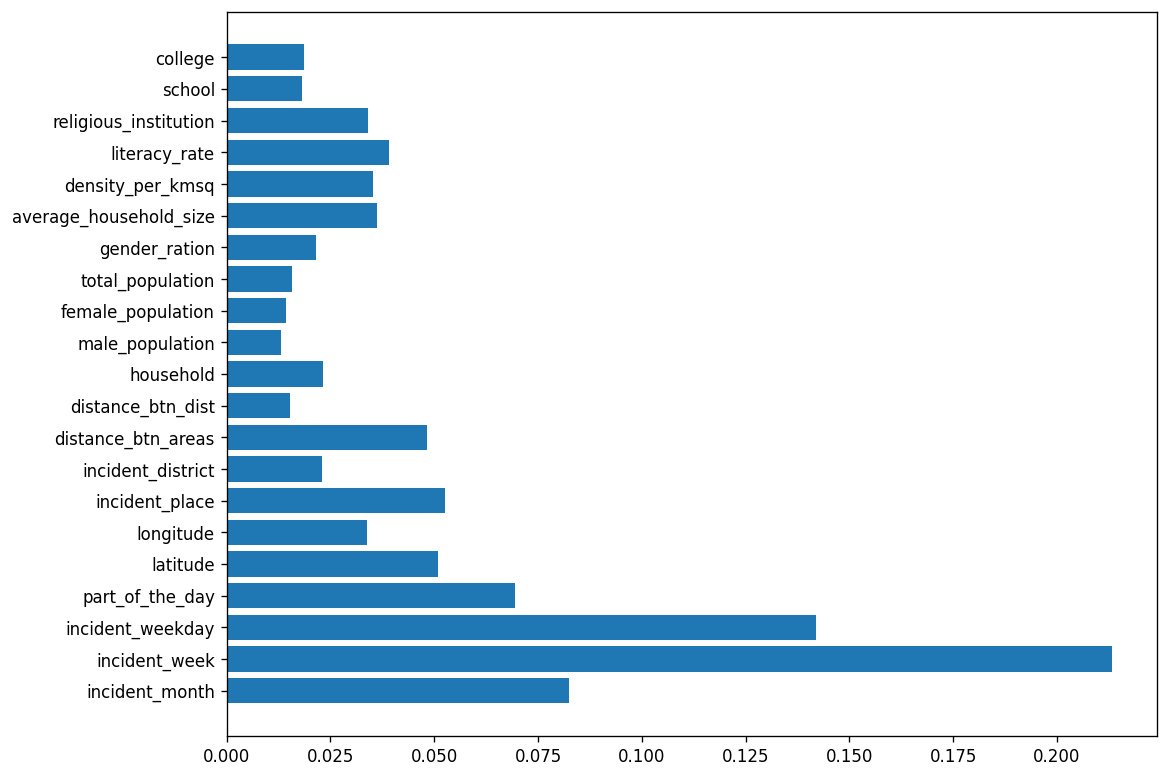

In [85]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth = 200)
classifier.fit(X_train, y_train)
print("Feature Importance:")
from matplotlib.pyplot import figure
figure(figsize=(10, 8), dpi=120)
plt.barh(X.columns, classifier.feature_importances_)

In [86]:
y_pred = classifier.predict(X_test)
y_train_pred = classifier.predict(X_train)
print("Test Performance: \n")
ModelPerformance(y_test,y_pred)
print("\nTrain Performance: \n")
ModelPerformance(y_train,y_train_pred)

Test Performance: 

Confusion Matrix:
[[38 23 34 27]
 [30 73 32 22]
 [25 25 77 19]
 [15 22 25 46]]

Accuracy per Class:
Assault: 31.147540983606557
BodyFound: 46.496815286624205
Murder: 52.73972602739726
Rape: 42.592592592592595

Accuracy: 0.44

Micro Precision: 0.44
Micro Recall: 0.44
Micro F1-score: 0.44

Macro Precision: 0.43
Macro Recall: 0.43
Macro F1-score: 0.43

Weighted Precision: 0.44
Weighted Recall: 0.44
Weighted F1-score: 0.44
Classification Report

              precision    recall  f1-score   support

     Assault       0.35      0.31      0.33       122
   BodyFound       0.51      0.46      0.49       157
      Murder       0.46      0.53      0.49       146
        Rape       0.40      0.43      0.41       108

    accuracy                           0.44       533
   macro avg       0.43      0.43      0.43       533
weighted avg       0.44      0.44      0.44       533


Train Performance: 

Confusion Matrix:
[[ 975    0    0    0]
 [   6 1352    2    0]
 [   6    8 1

### Ada-Boost

In [87]:
classifier = AdaBoostClassifier(n_estimators=50, learning_rate=1)
classifier.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1)

In [88]:
y_pred = classifier.predict(X_test)
y_train_pred = classifier.predict(X_train)
print("Test Performance: \n")
ModelPerformance(y_test,y_pred)
print("\nTrain Performance: \n")
ModelPerformance(y_train,y_train_pred)

Test Performance: 

Confusion Matrix:
[[26 38 37 21]
 [13 99 29 16]
 [ 9 34 85 18]
 [ 8 18 51 31]]

Accuracy per Class:
Assault: 21.311475409836063
BodyFound: 63.05732484076433
Murder: 58.21917808219178
Rape: 28.703703703703702

Accuracy: 0.45

Micro Precision: 0.45
Micro Recall: 0.45
Micro F1-score: 0.45

Macro Precision: 0.44
Macro Recall: 0.43
Macro F1-score: 0.42

Weighted Precision: 0.45
Weighted Recall: 0.45
Weighted F1-score: 0.43
Classification Report

              precision    recall  f1-score   support

     Assault       0.46      0.21      0.29       122
   BodyFound       0.52      0.63      0.57       157
      Murder       0.42      0.58      0.49       146
        Rape       0.36      0.29      0.32       108

    accuracy                           0.45       533
   macro avg       0.44      0.43      0.42       533
weighted avg       0.45      0.45      0.43       533


Train Performance: 

Confusion Matrix:
[[229 325 273 148]
 [125 818 256 161]
 [100 286 775 211]
 [ 

### Extra-Tree

In [89]:
classifier = ExtraTreesClassifier(n_estimators=100, random_state=0)
classifier.fit(X_train, y_train)

ExtraTreesClassifier(random_state=0)

In [90]:
y_pred = classifier.predict(X_test)
y_train_pred = classifier.predict(X_train)
print("Test Performance: \n")
ModelPerformance(y_test,y_pred)
print("\nTrain Performance: \n")
ModelPerformance(y_train,y_train_pred)

Test Performance: 

Confusion Matrix:
[[46 26 30 20]
 [31 78 29 19]
 [20 31 78 17]
 [17 16 34 41]]

Accuracy per Class:
Assault: 37.704918032786885
BodyFound: 49.681528662420384
Murder: 53.42465753424658
Rape: 37.96296296296296

Accuracy: 0.46

Micro Precision: 0.46
Micro Recall: 0.46
Micro F1-score: 0.46

Macro Precision: 0.45
Macro Recall: 0.45
Macro F1-score: 0.45

Weighted Precision: 0.46
Weighted Recall: 0.46
Weighted F1-score: 0.45
Classification Report

              precision    recall  f1-score   support

     Assault       0.40      0.38      0.39       122
   BodyFound       0.52      0.50      0.51       157
      Murder       0.46      0.53      0.49       146
        Rape       0.42      0.38      0.40       108

    accuracy                           0.46       533
   macro avg       0.45      0.45      0.45       533
weighted avg       0.46      0.46      0.45       533


Train Performance: 

Confusion Matrix:
[[ 975    0    0    0]
 [   6 1352    2    0]
 [   6    8 13

## After Removing Demographic Feature

In [91]:
feature_drop = ['weekend', 'incident_division', 'visibility', 'season', 'weather', 'playground', 'park', 'police_station', 'cyber_cafe', 'cinema','household', 'male_population',
       'female_population', 'total_population', 'gender_ration', 'average_household_size', 'density_per_kmsq', 'literacy_rate', 'religious_institution', 'school', 'college']
X,y = PrepareDataset(df, feature_drop)
X_train, X_test, y_train, y_test = SplitDataset(X,y, test_size = .10)

### Random Forest

In [92]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 2000 ,criterion = 'gini', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=2000, random_state=0)

Feature Importance:


<BarContainer object of 18 artists>

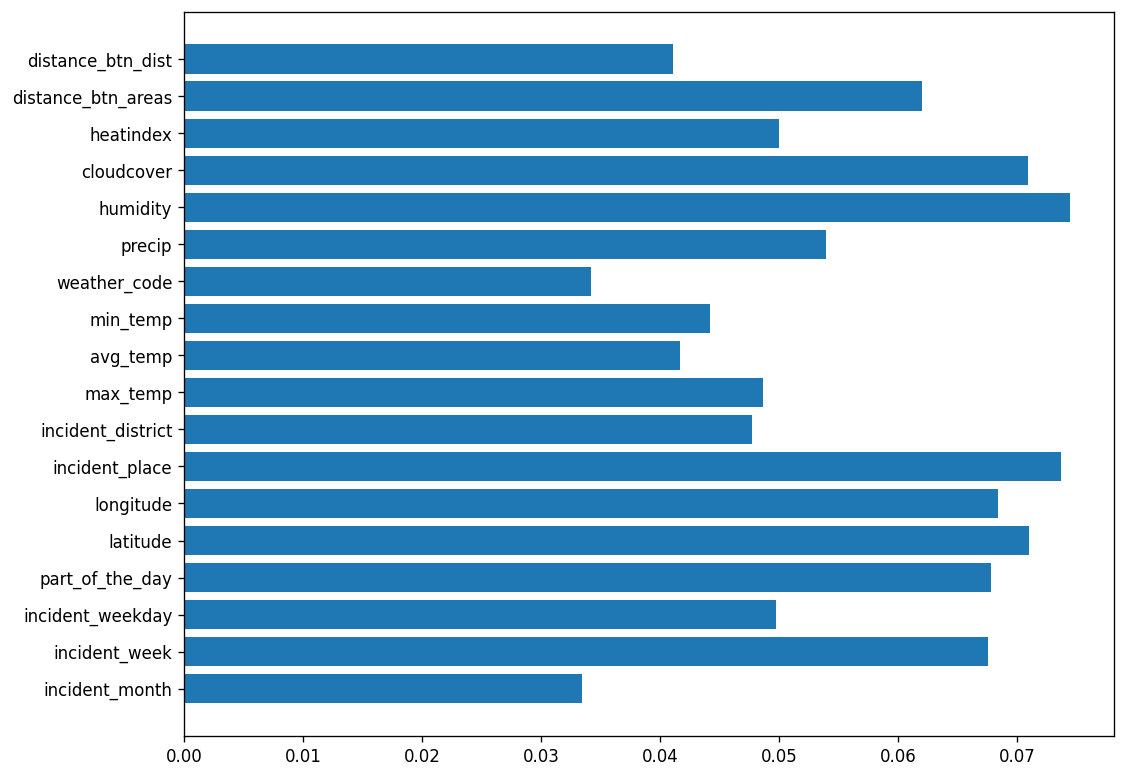

In [93]:
print("Feature Importance:")
from matplotlib.pyplot import figure
figure(figsize=(10, 8), dpi=120)
plt.barh(X.columns, classifier.feature_importances_)

In [94]:
y_pred = classifier.predict(X_test)
y_train_pred = classifier.predict(X_train)
print("***************************** Test Performance: *****************************\n")
ModelPerformance(y_test,y_pred)
print("\n***************************** Train Performance: *****************************\n")
ModelPerformance(y_train,y_train_pred)

***************************** Test Performance: *****************************

Confusion Matrix:
[[41 24 37 20]
 [18 97 28 14]
 [10 25 95 16]
 [ 8 15 36 49]]

Accuracy per Class:
Assault: 33.60655737704918
BodyFound: 61.78343949044586
Murder: 65.06849315068493
Rape: 45.370370370370374

Accuracy: 0.53

Micro Precision: 0.53
Micro Recall: 0.53
Micro F1-score: 0.53

Macro Precision: 0.53
Macro Recall: 0.51
Macro F1-score: 0.51

Weighted Precision: 0.53
Weighted Recall: 0.53
Weighted F1-score: 0.52
Classification Report

              precision    recall  f1-score   support

     Assault       0.53      0.34      0.41       122
   BodyFound       0.60      0.62      0.61       157
      Murder       0.48      0.65      0.56       146
        Rape       0.49      0.45      0.47       108

    accuracy                           0.53       533
   macro avg       0.53      0.51      0.51       533
weighted avg       0.53      0.53      0.52       533


***************************** Train Perfo

### XGBoost

Feature Importance:


<BarContainer object of 18 artists>

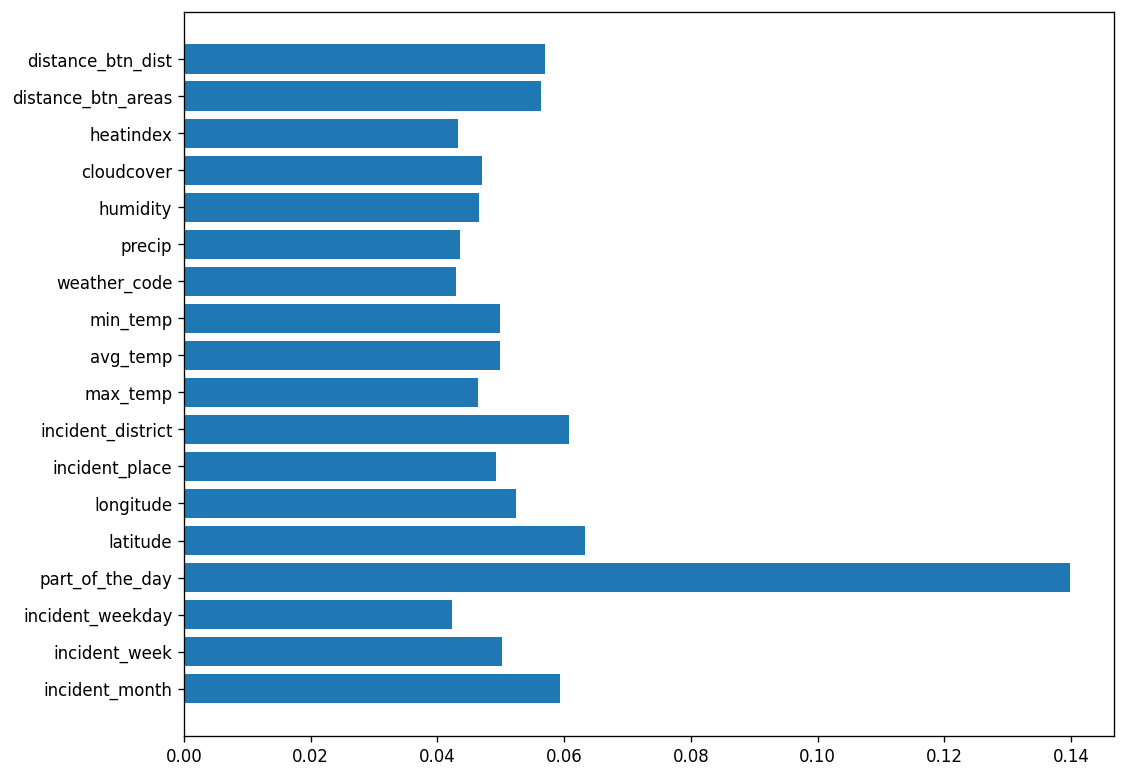

In [95]:
from xgboost import XGBClassifier
classifier = XGBClassifier(n_estimators = 1000)
classifier.fit(X_train, y_train)
print("Feature Importance:")
from matplotlib.pyplot import figure
figure(figsize=(10, 8), dpi=120)
plt.barh(X.columns, classifier.feature_importances_)

In [96]:
y_pred = classifier.predict(X_test)
y_train_pred = classifier.predict(X_train)
print("Test Performance: \n")
ModelPerformance(y_test,y_pred)
print("\nTrain Performance: \n")
ModelPerformance(y_train,y_train_pred)

Test Performance: 

Confusion Matrix:
[[41 24 34 23]
 [27 80 36 14]
 [19 21 86 20]
 [15 18 28 47]]

Accuracy per Class:
Assault: 33.60655737704918
BodyFound: 50.955414012738856
Murder: 58.9041095890411
Rape: 43.51851851851852

Accuracy: 0.48

Micro Precision: 0.48
Micro Recall: 0.48
Micro F1-score: 0.48

Macro Precision: 0.47
Macro Recall: 0.47
Macro F1-score: 0.47

Weighted Precision: 0.48
Weighted Recall: 0.48
Weighted F1-score: 0.47
Classification Report

              precision    recall  f1-score   support

     Assault       0.40      0.34      0.37       122
   BodyFound       0.56      0.51      0.53       157
      Murder       0.47      0.59      0.52       146
        Rape       0.45      0.44      0.44       108

    accuracy                           0.48       533
   macro avg       0.47      0.47      0.47       533
weighted avg       0.48      0.48      0.47       533


Train Performance: 

Confusion Matrix:
[[ 971    1    1    2]
 [   0 1354    4    2]
 [   2    1 1363

### SVM

In [97]:
def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()
from sklearn import svm

#### RBF

In [98]:
classifier_rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo').fit(X_train, y_train)

In [99]:
y_pred = classifier_rbf.predict(X_test)
y_train_pred = classifier_rbf.predict(X_train)
print("Test Performance: \n")
ModelPerformance(y_test,y_pred)
print("\nTrain Performance: \n")
ModelPerformance(y_train,y_train_pred)

Test Performance: 

Confusion Matrix:
[[ 10 100   8   4]
 [  2 145   9   1]
 [  1 111  33   1]
 [  1  88   7  12]]

Accuracy per Class:
Assault: 8.19672131147541
BodyFound: 92.35668789808918
Murder: 22.602739726027394
Rape: 11.11111111111111

Accuracy: 0.38

Micro Precision: 0.38
Micro Recall: 0.38
Micro F1-score: 0.38

Macro Precision: 0.57
Macro Recall: 0.34
Macro F1-score: 0.29

Weighted Precision: 0.55
Weighted Recall: 0.38
Weighted F1-score: 0.30
Classification Report

              precision    recall  f1-score   support

     Assault       0.71      0.08      0.15       122
   BodyFound       0.33      0.92      0.48       157
      Murder       0.58      0.23      0.33       146
        Rape       0.67      0.11      0.19       108

    accuracy                           0.38       533
   macro avg       0.57      0.34      0.29       533
weighted avg       0.55      0.38      0.30       533


Train Performance: 

Confusion Matrix:
[[ 966    3    4    2]
 [   0 1358    2    0]


#### Poly

In [100]:
classifier_poly = svm.SVC(kernel='poly', degree=10, C=1, decision_function_shape='ovo').fit(X_train, y_train)

In [101]:
y_pred = classifier_poly.predict(X_test)
y_train_pred = classifier_poly.predict(X_train)
print("Test Performance: \n")
ModelPerformance(y_test,y_pred)
print("\nTrain Performance: \n")
ModelPerformance(y_train,y_train_pred)

Test Performance: 

Confusion Matrix:
[[  7   8 107   0]
 [  3  20 133   1]
 [  1   2 142   1]
 [  1   8  99   0]]

Accuracy per Class:
Assault: 5.737704918032787
BodyFound: 12.738853503184714
Murder: 97.26027397260275
Rape: 0.0

Accuracy: 0.32

Micro Precision: 0.32
Micro Recall: 0.32
Micro F1-score: 0.32

Macro Precision: 0.35
Macro Recall: 0.29
Macro F1-score: 0.19

Weighted Precision: 0.37
Weighted Recall: 0.32
Weighted F1-score: 0.21
Classification Report

              precision    recall  f1-score   support

     Assault       0.58      0.06      0.10       122
   BodyFound       0.53      0.13      0.21       157
      Murder       0.30      0.97      0.45       146
        Rape       0.00      0.00      0.00       108

    accuracy                           0.32       533
   macro avg       0.35      0.29      0.19       533
weighted avg       0.37      0.32      0.21       533


Train Performance: 

Confusion Matrix:
[[  50   52  863   10]
 [  38  144 1174    4]
 [  25   54 1

#### Sigmoid

In [102]:
classifier_sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo').fit(X_train, y_train)

In [103]:
y_pred = classifier_sig.predict(X_test)
y_train_pred = classifier_sig.predict(X_train)
print("Test Performance: \n")
ModelPerformance(y_test,y_pred)
print("\nTrain Performance: \n")
ModelPerformance(y_train,y_train_pred)

Test Performance: 

Confusion Matrix:
[[47  8  7 60]
 [53 17  7 80]
 [61 15 11 59]
 [41 13  8 46]]

Accuracy per Class:
Assault: 38.52459016393443
BodyFound: 10.828025477707007
Murder: 7.534246575342466
Rape: 42.592592592592595

Accuracy: 0.23

Micro Precision: 0.23
Micro Recall: 0.23
Micro F1-score: 0.23

Macro Precision: 0.27
Macro Recall: 0.25
Macro F1-score: 0.21

Weighted Precision: 0.28
Weighted Recall: 0.23
Weighted F1-score: 0.20
Classification Report

              precision    recall  f1-score   support

     Assault       0.23      0.39      0.29       122
   BodyFound       0.32      0.11      0.16       157
      Murder       0.33      0.08      0.12       146
        Rape       0.19      0.43      0.26       108

    accuracy                           0.23       533
   macro avg       0.27      0.25      0.21       533
weighted avg       0.28      0.23      0.20       533


Train Performance: 

Confusion Matrix:
[[447  79  51 398]
 [533 157  82 588]
 [503 157 122 590]
 [4

#### Linear

In [104]:
# classifier_linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(X_train, y_train)

In [105]:
# y_pred = classifier_linear.predict(X_test)
# y_train_pred = classifier_linear.predict(X_train)
# print("Test Performance: \n")
# ModelPerformance(y_test,y_pred)
# print("\nTrain Performance: \n")
# ModelPerformance(y_train,y_train_pred)

### Naive Bayes

In [106]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [107]:
y_pred = classifier.predict(X_test)
y_train_pred = classifier.predict(X_train)
print("Test Performance: \n")
ModelPerformance(y_test,y_pred)
print("\nTrain Performance: \n")
ModelPerformance(y_train,y_train_pred)

Test Performance: 

Confusion Matrix:
[[20 24 51 27]
 [20 50 56 31]
 [10 24 81 31]
 [14 20 44 30]]

Accuracy per Class:
Assault: 16.39344262295082
BodyFound: 31.84713375796178
Murder: 55.47945205479452
Rape: 27.77777777777778

Accuracy: 0.34

Micro Precision: 0.34
Micro Recall: 0.34
Micro F1-score: 0.34

Macro Precision: 0.33
Macro Recall: 0.33
Macro F1-score: 0.32

Weighted Precision: 0.34
Weighted Recall: 0.34
Weighted F1-score: 0.33
Classification Report

              precision    recall  f1-score   support

     Assault       0.31      0.16      0.22       122
   BodyFound       0.42      0.32      0.36       157
      Murder       0.35      0.55      0.43       146
        Rape       0.25      0.28      0.26       108

    accuracy                           0.34       533
   macro avg       0.33      0.33      0.32       533
weighted avg       0.34      0.34      0.33       533


Train Performance: 

Confusion Matrix:
[[166 237 350 222]
 [151 512 448 249]
 [109 287 720 256]
 [102

### Decision Tree

Feature Importance:


<BarContainer object of 18 artists>

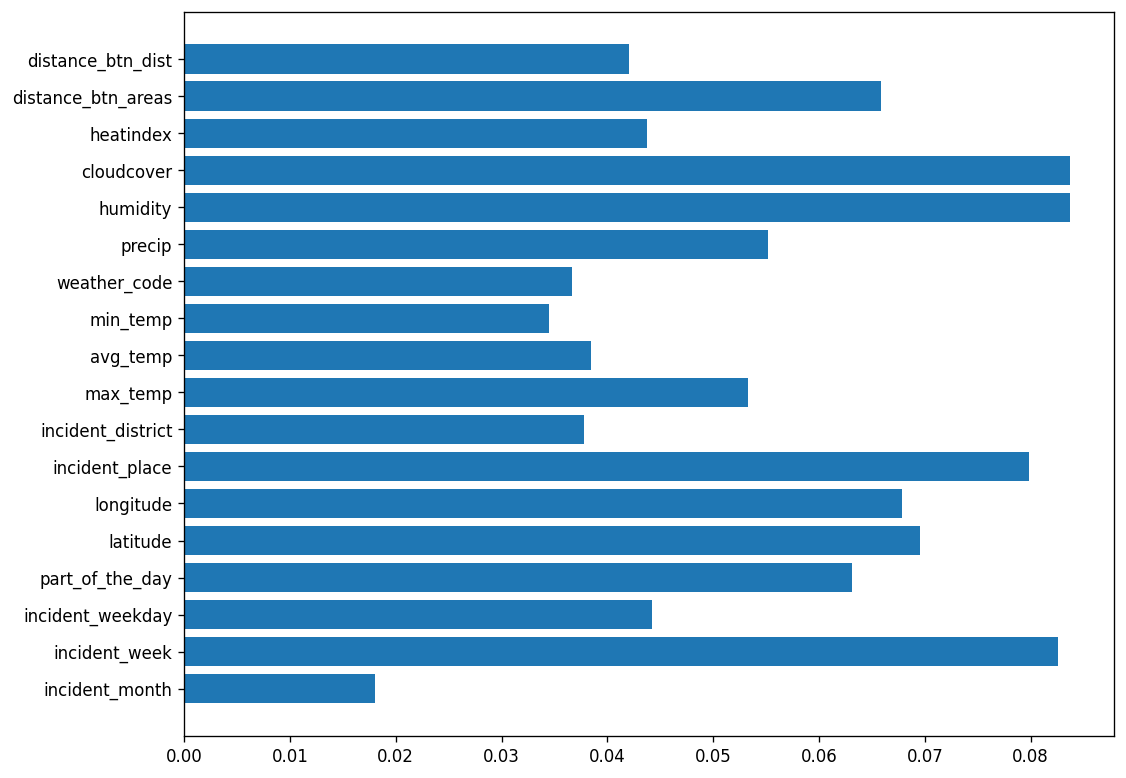

In [108]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth = 200)
classifier.fit(X_train, y_train)
print("Feature Importance:")
from matplotlib.pyplot import figure
figure(figsize=(10, 8), dpi=120)
plt.barh(X.columns, classifier.feature_importances_)

In [109]:
y_pred = classifier.predict(X_test)
y_train_pred = classifier.predict(X_train)
print("Test Performance: \n")
ModelPerformance(y_test,y_pred)
print("\nTrain Performance: \n")
ModelPerformance(y_train,y_train_pred)

Test Performance: 

Confusion Matrix:
[[39 27 36 20]
 [39 69 29 20]
 [24 23 75 24]
 [17 24 32 35]]

Accuracy per Class:
Assault: 31.967213114754102
BodyFound: 43.94904458598726
Murder: 51.369863013698634
Rape: 32.407407407407405

Accuracy: 0.41

Micro Precision: 0.41
Micro Recall: 0.41
Micro F1-score: 0.41

Macro Precision: 0.40
Macro Recall: 0.40
Macro F1-score: 0.40

Weighted Precision: 0.41
Weighted Recall: 0.41
Weighted F1-score: 0.41
Classification Report

              precision    recall  f1-score   support

     Assault       0.33      0.32      0.32       122
   BodyFound       0.48      0.44      0.46       157
      Murder       0.44      0.51      0.47       146
        Rape       0.35      0.32      0.34       108

    accuracy                           0.41       533
   macro avg       0.40      0.40      0.40       533
weighted avg       0.41      0.41      0.41       533


Train Performance: 

Confusion Matrix:
[[ 975    0    0    0]
 [   2 1356    2    0]
 [   3    3 1

### Ada-Boost

In [110]:
classifier = AdaBoostClassifier(n_estimators=50, learning_rate=1)
classifier.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1)

In [111]:
y_pred = classifier.predict(X_test)
y_train_pred = classifier.predict(X_train)
print("Test Performance: \n")
ModelPerformance(y_test,y_pred)
print("\nTrain Performance: \n")
ModelPerformance(y_train,y_train_pred)

Test Performance: 

Confusion Matrix:
[[21 35 43 23]
 [15 93 29 20]
 [11 35 82 18]
 [13 22 49 24]]

Accuracy per Class:
Assault: 17.21311475409836
BodyFound: 59.23566878980891
Murder: 56.16438356164384
Rape: 22.22222222222222

Accuracy: 0.41

Micro Precision: 0.41
Micro Recall: 0.41
Micro F1-score: 0.41

Macro Precision: 0.38
Macro Recall: 0.39
Macro F1-score: 0.37

Weighted Precision: 0.40
Weighted Recall: 0.41
Weighted F1-score: 0.39
Classification Report

              precision    recall  f1-score   support

     Assault       0.35      0.17      0.23       122
   BodyFound       0.50      0.59      0.54       157
      Murder       0.40      0.56      0.47       146
        Rape       0.28      0.22      0.25       108

    accuracy                           0.41       533
   macro avg       0.38      0.39      0.37       533
weighted avg       0.40      0.41      0.39       533


Train Performance: 

Confusion Matrix:
[[233 306 283 153]
 [127 804 279 150]
 [112 277 780 203]
 [103

### Extra-Tree

In [112]:
classifier = ExtraTreesClassifier(n_estimators=100, random_state=0)
classifier.fit(X_train, y_train)

ExtraTreesClassifier(random_state=0)

In [113]:
y_pred = classifier.predict(X_test)
y_train_pred = classifier.predict(X_train)
print("Test Performance: \n")
ModelPerformance(y_test,y_pred)
print("\nTrain Performance: \n")
ModelPerformance(y_train,y_train_pred)

Test Performance: 

Confusion Matrix:
[[35 26 40 21]
 [20 91 30 16]
 [20 25 92  9]
 [10 17 37 44]]

Accuracy per Class:
Assault: 28.688524590163933
BodyFound: 57.961783439490446
Murder: 63.013698630136986
Rape: 40.74074074074074

Accuracy: 0.49

Micro Precision: 0.49
Micro Recall: 0.49
Micro F1-score: 0.49

Macro Precision: 0.48
Macro Recall: 0.48
Macro F1-score: 0.47

Weighted Precision: 0.49
Weighted Recall: 0.49
Weighted F1-score: 0.48
Classification Report

              precision    recall  f1-score   support

     Assault       0.41      0.29      0.34       122
   BodyFound       0.57      0.58      0.58       157
      Murder       0.46      0.63      0.53       146
        Rape       0.49      0.41      0.44       108

    accuracy                           0.49       533
   macro avg       0.48      0.48      0.47       533
weighted avg       0.49      0.49      0.48       533


Train Performance: 

Confusion Matrix:
[[ 975    0    0    0]
 [   2 1356    2    0]
 [   3    3 1

# Model - Incremental

## 25 %

In [19]:
df_25 = df.sample(frac=0.25)
feature_drop = ['weekend', 'incident_division', 'visibility', 'season', 'weather', 'playground', 'park', 'police_station', 'cyber_cafe', 'cinema']
X,y = PrepareDataset(df_25, feature_drop)
X_train, X_test, y_train, y_test = SplitDataset(X,y, test_size = .10)

In [20]:
from sklearn.ensemble import RandomForestClassifier
# classifier = RandomForestClassifier(n_estimators = 5000 ,criterion = 'entropy', random_state = 0)
classifier = RandomForestClassifier(n_estimators = 2000 ,criterion = 'gini', random_state = 0)
# classifier = RandomForestClassifier(n_estimators = 2000 ,criterion = 'log_loss', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=2000, random_state=0)

Feature Importance:


<BarContainer object of 29 artists>

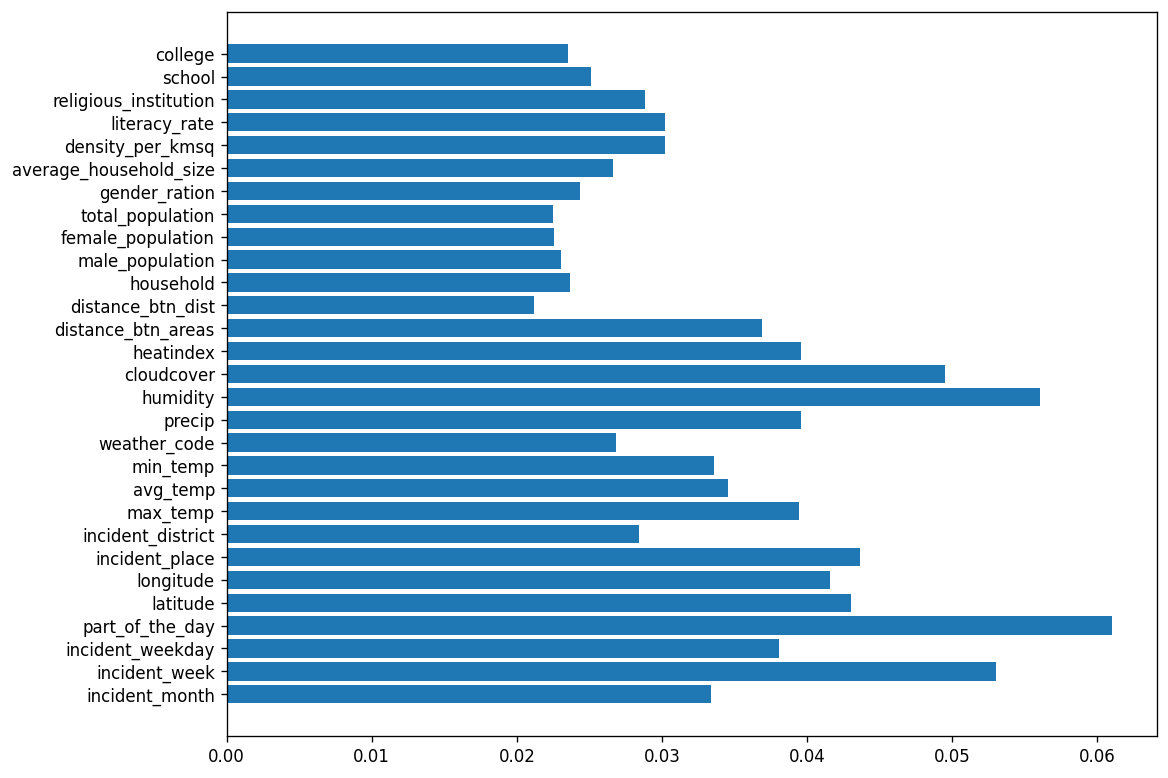

In [21]:
print("Feature Importance:")
from matplotlib.pyplot import figure
figure(figsize=(10, 8), dpi=120)
plt.barh(X.columns, classifier.feature_importances_)

In [22]:
y_pred = classifier.predict(X_test)
y_train_pred = classifier.predict(X_train)
print("***************************** Test Performance: *****************************\n")
ModelPerformance(y_test,y_pred)
print("\n***************************** Train Performance: *****************************\n")
ModelPerformance(y_train,y_train_pred)

***************************** Test Performance: *****************************

Confusion Matrix:
[[ 9  9 10  4]
 [ 6 17  7  4]
 [ 2  7 14  5]
 [ 6 12 10 12]]

Accuracy per Class:
Assault: 28.125
BodyFound: 50.0
Murder: 50.0
Rape: 30.0

Accuracy: 0.39

Micro Precision: 0.39
Micro Recall: 0.39
Micro F1-score: 0.39

Macro Precision: 0.40
Macro Recall: 0.40
Macro F1-score: 0.38

Weighted Precision: 0.40
Weighted Recall: 0.39
Weighted F1-score: 0.38
Classification Report

              precision    recall  f1-score   support

     Assault       0.39      0.28      0.33        32
   BodyFound       0.38      0.50      0.43        34
      Murder       0.34      0.50      0.41        28
        Rape       0.48      0.30      0.37        40

    accuracy                           0.39       134
   macro avg       0.40      0.40      0.38       134
weighted avg       0.40      0.39      0.38       134


***************************** Train Performance: *****************************

Confusion Ma

## 50%

In [23]:
df_50 = df.sample(frac=0.5)
feature_drop = ['weekend', 'incident_division', 'visibility', 'season', 'weather', 'playground', 'park', 'police_station', 'cyber_cafe', 'cinema']
X,y = PrepareDataset(df_50, feature_drop)
X_train, X_test, y_train, y_test = SplitDataset(X,y, test_size = .10)

In [24]:
from sklearn.ensemble import RandomForestClassifier
# classifier = RandomForestClassifier(n_estimators = 5000 ,criterion = 'entropy', random_state = 0)
classifier = RandomForestClassifier(n_estimators = 2000 ,criterion = 'gini', random_state = 0)
# classifier = RandomForestClassifier(n_estimators = 2000 ,criterion = 'log_loss', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=2000, random_state=0)

Feature Importance:


<BarContainer object of 29 artists>

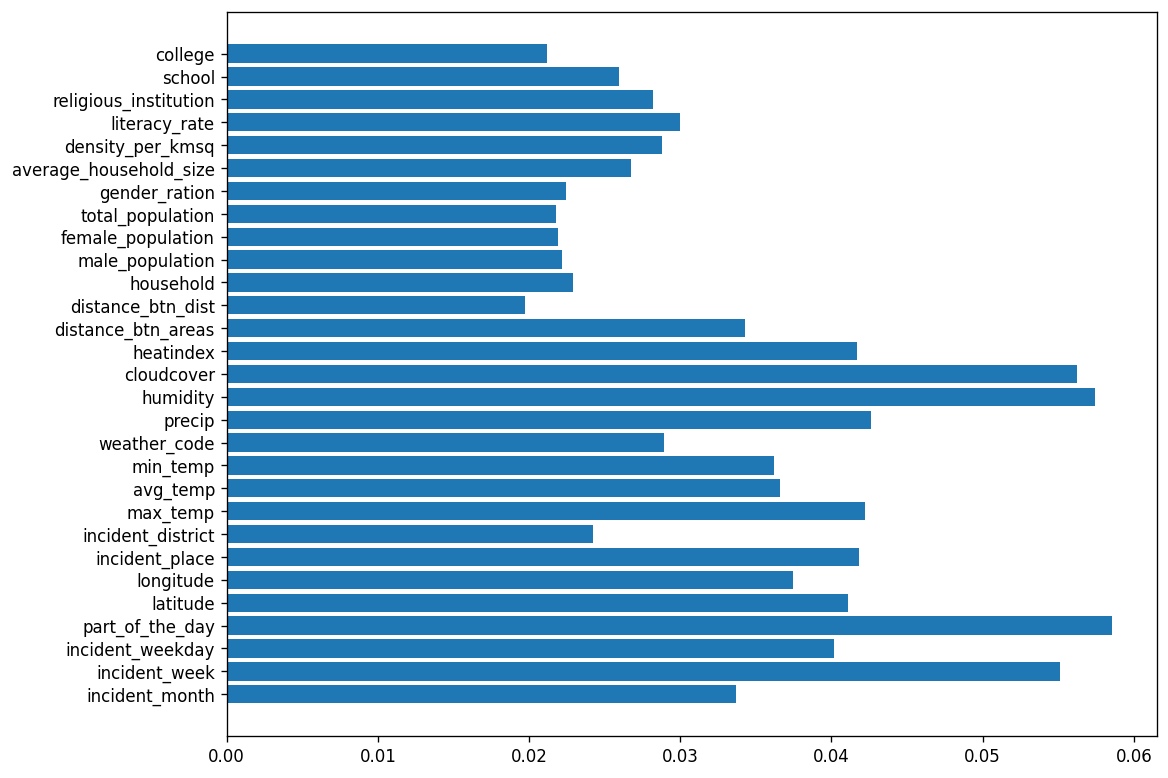

In [25]:
print("Feature Importance:")
from matplotlib.pyplot import figure
figure(figsize=(10, 8), dpi=120)
plt.barh(X.columns, classifier.feature_importances_)

In [26]:
y_pred = classifier.predict(X_test)
y_train_pred = classifier.predict(X_train)
print("***************************** Test Performance: *****************************\n")
ModelPerformance(y_test,y_pred)
print("\n***************************** Train Performance: *****************************\n")
ModelPerformance(y_train,y_train_pred)

***************************** Test Performance: *****************************

Confusion Matrix:
[[12 18 11 11]
 [ 8 52 13  7]
 [11 12 35 14]
 [ 8 12 22 21]]

Accuracy per Class:
Assault: 23.076923076923077
BodyFound: 65.0
Murder: 48.61111111111111
Rape: 33.33333333333333

Accuracy: 0.45

Micro Precision: 0.45
Micro Recall: 0.45
Micro F1-score: 0.45

Macro Precision: 0.42
Macro Recall: 0.43
Macro F1-score: 0.42

Weighted Precision: 0.44
Weighted Recall: 0.45
Weighted F1-score: 0.44
Classification Report

              precision    recall  f1-score   support

     Assault       0.31      0.23      0.26        52
   BodyFound       0.55      0.65      0.60        80
      Murder       0.43      0.49      0.46        72
        Rape       0.40      0.33      0.36        63

    accuracy                           0.45       267
   macro avg       0.42      0.43      0.42       267
weighted avg       0.44      0.45      0.44       267


***************************** Train Performance: *****

## 75%

In [27]:
df_75 = df.sample(frac=0.75)
feature_drop = ['weekend', 'incident_division', 'visibility', 'season', 'weather', 'playground', 'park', 'police_station', 'cyber_cafe', 'cinema']
X,y = PrepareDataset(df_75, feature_drop)
X_train, X_test, y_train, y_test = SplitDataset(X,y, test_size = .10)

In [28]:
from sklearn.ensemble import RandomForestClassifier
# classifier = RandomForestClassifier(n_estimators = 5000 ,criterion = 'entropy', random_state = 0)
classifier = RandomForestClassifier(n_estimators = 2000 ,criterion = 'gini', random_state = 0)
# classifier = RandomForestClassifier(n_estimators = 2000 ,criterion = 'log_loss', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=2000, random_state=0)

Feature Importance:


<BarContainer object of 29 artists>

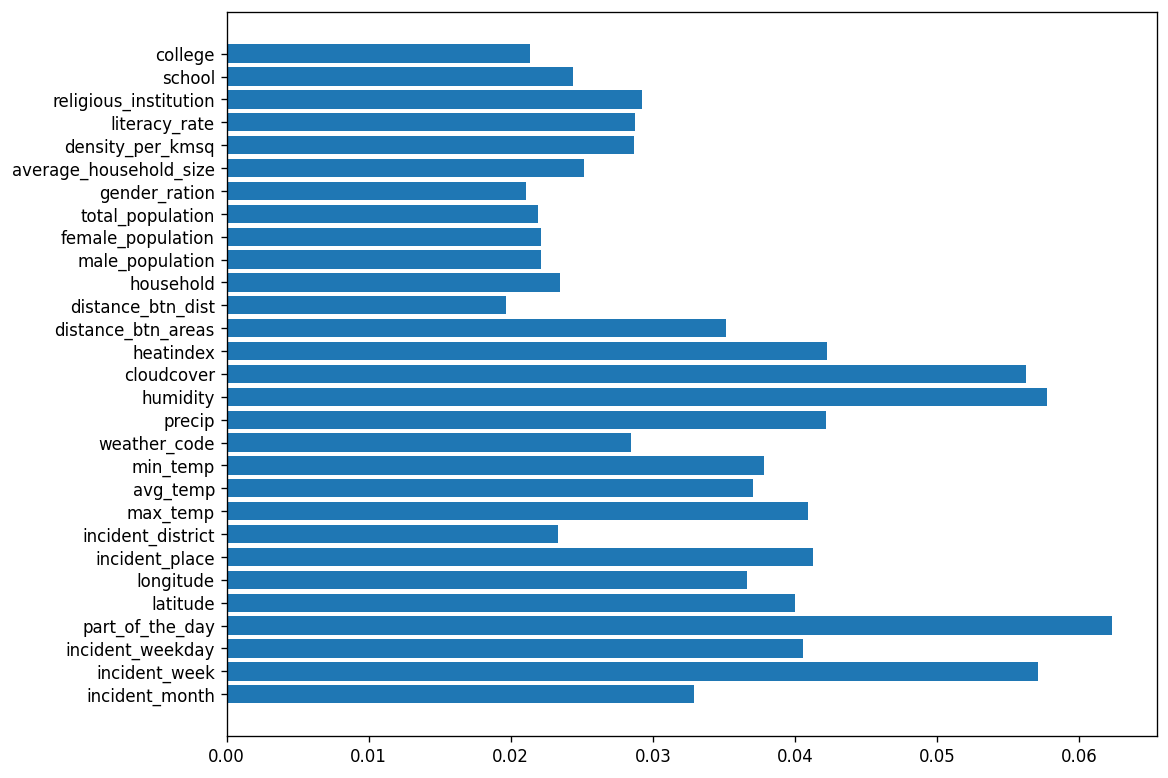

In [29]:
print("Feature Importance:")
from matplotlib.pyplot import figure
figure(figsize=(10, 8), dpi=120)
plt.barh(X.columns, classifier.feature_importances_)

In [30]:
y_pred = classifier.predict(X_test)
y_train_pred = classifier.predict(X_train)
print("***************************** Test Performance: *****************************\n")
ModelPerformance(y_test,y_pred)
print("\n***************************** Train Performance: *****************************\n")
ModelPerformance(y_train,y_train_pred)

***************************** Test Performance: *****************************

Confusion Matrix:
[[25 20 18 11]
 [11 66 23 14]
 [ 4 24 74 22]
 [ 7 23 27 31]]

Accuracy per Class:
Assault: 33.78378378378378
BodyFound: 57.89473684210527
Murder: 59.67741935483871
Rape: 35.22727272727273

Accuracy: 0.49

Micro Precision: 0.49
Micro Recall: 0.49
Micro F1-score: 0.49

Macro Precision: 0.49
Macro Recall: 0.47
Macro F1-score: 0.47

Weighted Precision: 0.49
Weighted Recall: 0.49
Weighted F1-score: 0.48
Classification Report

              precision    recall  f1-score   support

     Assault       0.53      0.34      0.41        74
   BodyFound       0.50      0.58      0.53       114
      Murder       0.52      0.60      0.56       124
        Rape       0.40      0.35      0.37        88

    accuracy                           0.49       400
   macro avg       0.49      0.47      0.47       400
weighted avg       0.49      0.49      0.48       400


***************************** Train Perfor

## 100%

In [31]:
df_100 = df.sample(frac=1)
feature_drop = ['weekend', 'incident_division', 'visibility', 'season', 'weather', 'playground', 'park', 'police_station', 'cyber_cafe', 'cinema']
X,y = PrepareDataset(df_100, feature_drop)
X_train, X_test, y_train, y_test = SplitDataset(X,y, test_size = .10)

In [32]:
from sklearn.ensemble import RandomForestClassifier
# classifier = RandomForestClassifier(n_estimators = 5000 ,criterion = 'entropy', random_state = 0)
classifier = RandomForestClassifier(n_estimators = 2000 ,criterion = 'gini', random_state = 0)
# classifier = RandomForestClassifier(n_estimators = 2000 ,criterion = 'log_loss', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=2000, random_state=0)

Feature Importance:


<BarContainer object of 29 artists>

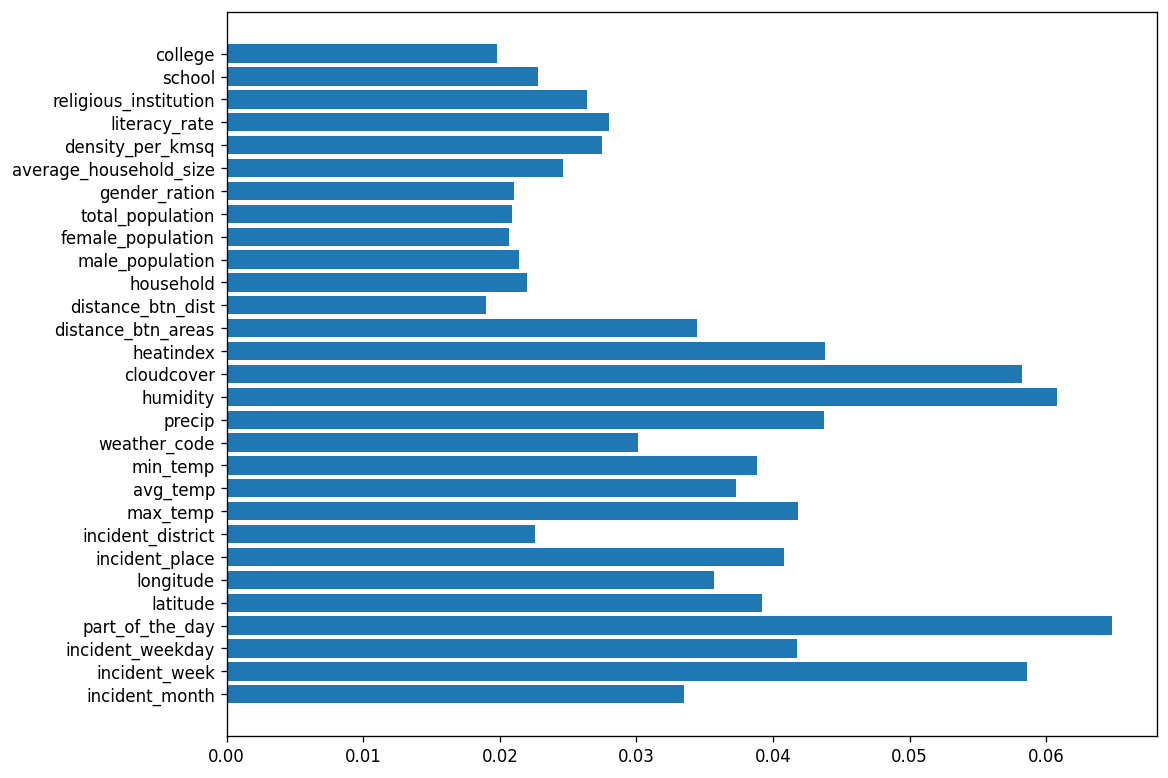

In [33]:
print("Feature Importance:")
from matplotlib.pyplot import figure
figure(figsize=(10, 8), dpi=120)
plt.barh(X.columns, classifier.feature_importances_)

In [34]:
y_pred = classifier.predict(X_test)
y_train_pred = classifier.predict(X_train)
print("***************************** Test Performance: *****************************\n")
ModelPerformance(y_test,y_pred)
print("\n***************************** Train Performance: *****************************\n")
ModelPerformance(y_train,y_train_pred)

***************************** Test Performance: *****************************

Confusion Matrix:
[[41 30 32 15]
 [15 98 27 22]
 [15 36 70  8]
 [16 16 36 56]]

Accuracy per Class:
Assault: 34.74576271186441
BodyFound: 60.49382716049383
Murder: 54.263565891472865
Rape: 45.16129032258064

Accuracy: 0.50

Micro Precision: 0.50
Micro Recall: 0.50
Micro F1-score: 0.50

Macro Precision: 0.50
Macro Recall: 0.49
Macro F1-score: 0.49

Weighted Precision: 0.50
Weighted Recall: 0.50
Weighted F1-score: 0.49
Classification Report

              precision    recall  f1-score   support

     Assault       0.47      0.35      0.40       118
   BodyFound       0.54      0.60      0.57       162
      Murder       0.42      0.54      0.48       129
        Rape       0.55      0.45      0.50       124

    accuracy                           0.50       533
   macro avg       0.50      0.49      0.49       533
weighted avg       0.50      0.50      0.49       533


***************************** Train Perfo

## 110%

In [35]:
frames = [df, df.sample(frac=.10)]
df_110 = pd.concat(frames)
feature_drop = ['weekend', 'incident_division', 'visibility', 'season', 'weather', 'playground', 'park', 'police_station', 'cyber_cafe', 'cinema']
X,y = PrepareDataset(df_110, feature_drop)
X_train, X_test, y_train, y_test = SplitDataset(X,y, test_size = .10)

In [36]:
from sklearn.ensemble import RandomForestClassifier
# classifier = RandomForestClassifier(n_estimators = 5000 ,criterion = 'entropy', random_state = 0)
classifier = RandomForestClassifier(n_estimators = 2000 ,criterion = 'gini', random_state = 0)
# classifier = RandomForestClassifier(n_estimators = 2000 ,criterion = 'log_loss', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=2000, random_state=0)

Feature Importance:


<BarContainer object of 29 artists>

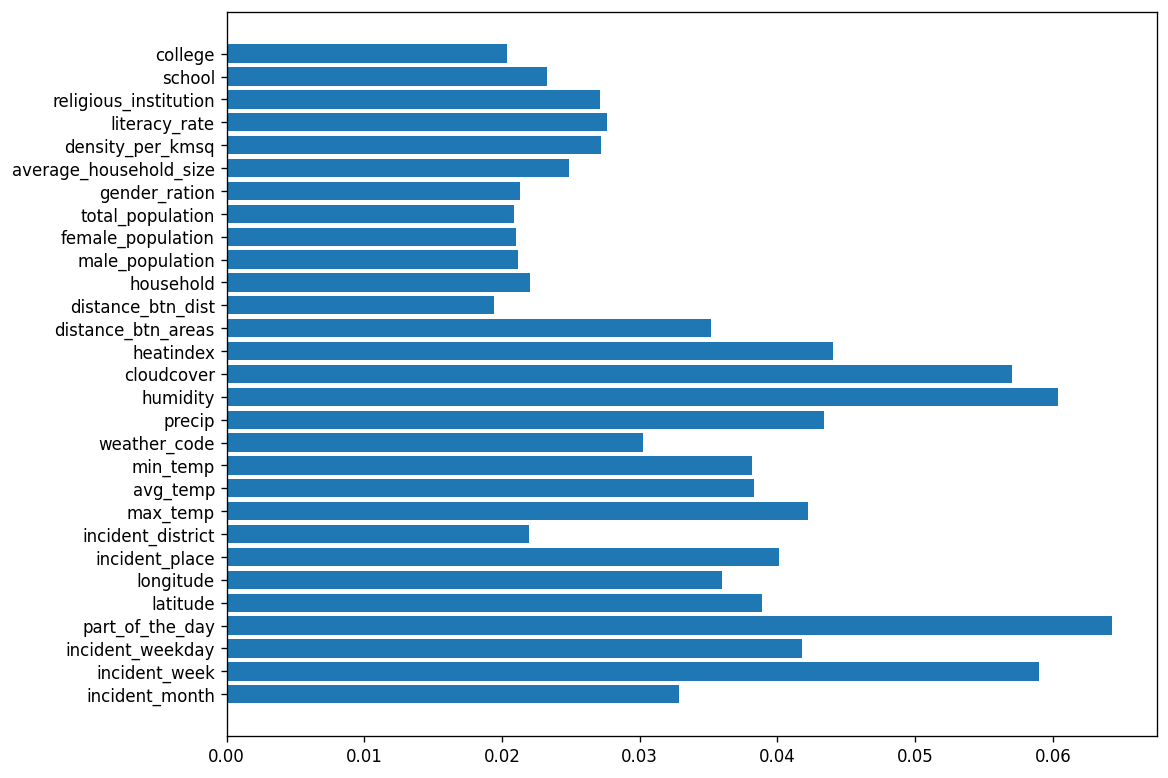

In [37]:
print("Feature Importance:")
from matplotlib.pyplot import figure
figure(figsize=(10, 8), dpi=120)
plt.barh(X.columns, classifier.feature_importances_)

In [38]:
y_pred = classifier.predict(X_test)
y_train_pred = classifier.predict(X_train)
print("***************************** Test Performance: *****************************\n")
ModelPerformance(y_test,y_pred)
print("\n***************************** Train Performance: *****************************\n")
ModelPerformance(y_train,y_train_pred)

***************************** Test Performance: *****************************

Confusion Matrix:
[[ 66  23  25  20]
 [ 17 102  19  17]
 [ 10  28 104  19]
 [ 16  25  28  67]]

Accuracy per Class:
Assault: 49.25373134328358
BodyFound: 65.80645161290323
Murder: 64.59627329192547
Rape: 49.26470588235294

Accuracy: 0.58

Micro Precision: 0.58
Micro Recall: 0.58
Micro F1-score: 0.58

Macro Precision: 0.58
Macro Recall: 0.57
Macro F1-score: 0.57

Weighted Precision: 0.58
Weighted Recall: 0.58
Weighted F1-score: 0.58
Classification Report

              precision    recall  f1-score   support

     Assault       0.61      0.49      0.54       134
   BodyFound       0.57      0.66      0.61       155
      Murder       0.59      0.65      0.62       161
        Rape       0.54      0.49      0.52       136

    accuracy                           0.58       586
   macro avg       0.58      0.57      0.57       586
weighted avg       0.58      0.58      0.58       586


**************************

## 120%

In [39]:
frames = [df, df.sample(frac=.20)]
df_120 = pd.concat(frames)
feature_drop = ['weekend', 'incident_division', 'visibility', 'season', 'weather', 'playground', 'park', 'police_station', 'cyber_cafe', 'cinema']
X,y = PrepareDataset(df_120, feature_drop)
X_train, X_test, y_train, y_test = SplitDataset(X,y, test_size = .10)

In [40]:
from sklearn.ensemble import RandomForestClassifier
# classifier = RandomForestClassifier(n_estimators = 5000 ,criterion = 'entropy', random_state = 0)
classifier = RandomForestClassifier(n_estimators = 2000 ,criterion = 'gini', random_state = 0)
# classifier = RandomForestClassifier(n_estimators = 2000 ,criterion = 'log_loss', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=2000, random_state=0)

Feature Importance:


<BarContainer object of 29 artists>

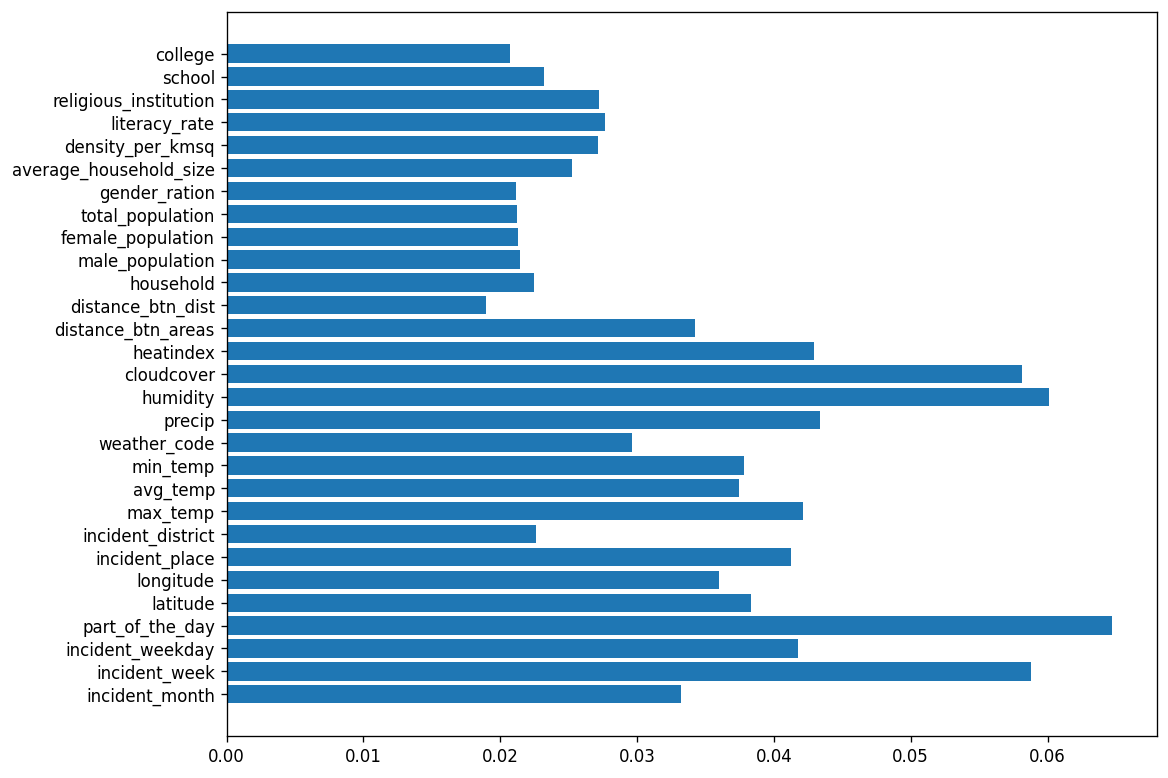

In [41]:
print("Feature Importance:")
from matplotlib.pyplot import figure
figure(figsize=(10, 8), dpi=120)
plt.barh(X.columns, classifier.feature_importances_)

In [42]:
y_pred = classifier.predict(X_test)
y_train_pred = classifier.predict(X_train)
print("***************************** Test Performance: *****************************\n")
ModelPerformance(y_test,y_pred)
print("\n***************************** Train Performance: *****************************\n")
ModelPerformance(y_train,y_train_pred)

***************************** Test Performance: *****************************

Confusion Matrix:
[[ 78  34  27  14]
 [ 24 119  13   8]
 [ 10  22 121  21]
 [  7  18  21 102]]

Accuracy per Class:
Assault: 50.98039215686274
BodyFound: 72.5609756097561
Murder: 69.54022988505747
Rape: 68.91891891891892

Accuracy: 0.66

Micro Precision: 0.66
Micro Recall: 0.66
Micro F1-score: 0.66

Macro Precision: 0.66
Macro Recall: 0.66
Macro F1-score: 0.65

Weighted Precision: 0.66
Weighted Recall: 0.66
Weighted F1-score: 0.65
Classification Report

              precision    recall  f1-score   support

     Assault       0.66      0.51      0.57       153
   BodyFound       0.62      0.73      0.67       164
      Murder       0.66      0.70      0.68       174
        Rape       0.70      0.69      0.70       148

    accuracy                           0.66       639
   macro avg       0.66      0.66      0.65       639
weighted avg       0.66      0.66      0.65       639


***************************

## 130%

In [43]:
frames = [df, df.sample(frac=.30)]
df_130 = pd.concat(frames)
feature_drop = ['weekend', 'incident_division', 'visibility', 'season', 'weather', 'playground', 'park', 'police_station', 'cyber_cafe', 'cinema']
X,y = PrepareDataset(df_130, feature_drop)
X_train, X_test, y_train, y_test = SplitDataset(X,y, test_size = .10)

In [44]:
from sklearn.ensemble import RandomForestClassifier
# classifier = RandomForestClassifier(n_estimators = 5000 ,criterion = 'entropy', random_state = 0)
classifier = RandomForestClassifier(n_estimators = 2000 ,criterion = 'gini', random_state = 0)
# classifier = RandomForestClassifier(n_estimators = 2000 ,criterion = 'log_loss', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=2000, random_state=0)

Feature Importance:


<BarContainer object of 29 artists>

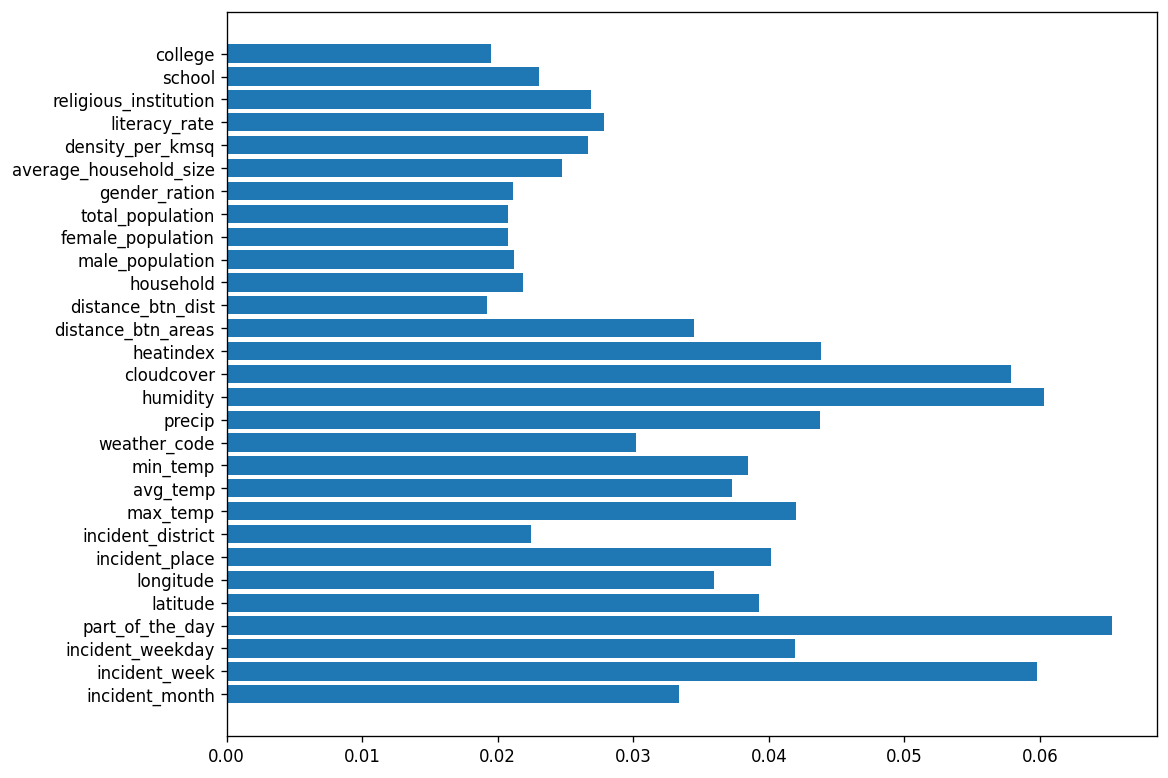

In [45]:
print("Feature Importance:")
from matplotlib.pyplot import figure
figure(figsize=(10, 8), dpi=120)
plt.barh(X.columns, classifier.feature_importances_)

In [46]:
y_pred = classifier.predict(X_test)
y_train_pred = classifier.predict(X_train)
print("***************************** Test Performance: *****************************\n")
ModelPerformance(y_test,y_pred)
print("\n***************************** Train Performance: *****************************\n")
ModelPerformance(y_train,y_train_pred)

***************************** Test Performance: *****************************

Confusion Matrix:
[[ 95  21  17  23]
 [ 19 134  18  18]
 [ 15  23 153  17]
 [ 14  13  20  93]]

Accuracy per Class:
Assault: 60.89743589743589
BodyFound: 70.8994708994709
Murder: 73.5576923076923
Rape: 66.42857142857143

Accuracy: 0.69

Micro Precision: 0.69
Micro Recall: 0.69
Micro F1-score: 0.69

Macro Precision: 0.68
Macro Recall: 0.68
Macro F1-score: 0.68

Weighted Precision: 0.69
Weighted Recall: 0.69
Weighted F1-score: 0.69
Classification Report

              precision    recall  f1-score   support

     Assault       0.66      0.61      0.64       156
   BodyFound       0.70      0.71      0.71       189
      Murder       0.74      0.74      0.74       208
        Rape       0.62      0.66      0.64       140

    accuracy                           0.69       693
   macro avg       0.68      0.68      0.68       693
weighted avg       0.69      0.69      0.69       693


****************************